# SEC Filings - Exploratory Data Analysis

## 1: Use `EDGAR Tools` to import all relevant data

In [ ]:
print("1.0: Installations")
print("-" * 30)

# Install the 'edgartools' library to interface with the SEC EDGAR database.
# On colab use the following command:
# %{sys.executable} -m pip install edgartools --quiet
import sys
!{sys.executable} -m pip install edgartools --quiet

print("Installation complete.")

1.0: Installations
------------------------------
Installation complete.



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
print("1.1: Imports & EDGAR Setup")
print("-" * 30)

# --- 1. Import necessary libraries ---
import pandas as pd
from edgar import Company, set_identity
import os

# --- 2. Set EDGAR User Identity (CRITICAL STEP) ---
# The SEC requires any script or bot that accesses EDGAR to have a custom User-Agent.
set_identity("University of Southampton ab3u21@soton.ac.uk")
print("EDGAR user identity set successfully.")

# --- 3. Define Constants ---
START_YEAR = 2018
END_YEAR = 2024
TARGET_TICKERS = ['AAPL', 'NVDA', 'GOOGL']
FORM_TYPES = ["10-K", "10-Q", "8-K"]
DATE_RANGE = f"{START_YEAR}-01-01:{END_YEAR}-12-31"

print("\nSetup complete. Ready to extract SEC filings.")
print(f"Tickers: {TARGET_TICKERS}")
print(f"Form Types: {FORM_TYPES}")
print(f"Date Range: {DATE_RANGE}")

1.1: Imports & EDGAR Setup
------------------------------
EDGAR user identity set successfully.

Setup complete. Ready to extract SEC filings.
Tickers: ['AAPL', 'NVDA', 'GOOGL']
Form Types: ['10-K', '10-Q', '8-K']
Date Range: 2018-01-01:2024-12-31


c:\Users\totob\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
print("1.2: Extract SEC Filings Data")
print("-" * 30)

# --- Data Storage ---
all_filings_data = []
print("Starting extraction of SEC filings. This may take a significant amount of time...")

# --- Loop through each stock and extract its filings ---
for ticker in TARGET_TICKERS:
    print(f"  > Processing filings for {ticker}...")
    try:
        company = Company(ticker)
        filings = company.get_filings().filter(date=DATE_RANGE, form=FORM_TYPES)
        
        for filing in filings:
            filing_text = filing.text()
            all_filings_data.append({
                'filing_date': filing.filing_date,
                'ticker': ticker,
                'form_type': filing.form,
                'text': filing_text
            })
            print(f"    - Extracted {filing.form} from {filing.filing_date}")
            
    except Exception as e:
        print(f"    - ERROR: Could not process filings for {ticker}. Reason: {e}")
        
print(f"\nFilings extraction complete. Total documents extracted: {len(all_filings_data)}")

1.2: Extract SEC Filings Data
------------------------------
Starting extraction of SEC filings. This may take a significant amount of time...
  > Processing filings for AAPL...


    - Extracted 10-K from 2024-11-01


    - Extracted 8-K from 2024-10-31


    - Extracted 8-K from 2024-09-10


    - Extracted 8-K from 2024-08-26


    - Extracted 8-K from 2024-08-23


    - Extracted 10-Q from 2024-08-02


    - Extracted 8-K from 2024-08-01


    - Extracted 8-K from 2024-05-03


    - Extracted 10-Q from 2024-05-03


    - Extracted 8-K from 2024-05-02


    - Extracted 8-K from 2024-02-28


    - Extracted 10-Q from 2024-02-02


    - Extracted 8-K from 2024-02-01


    - Extracted 10-K from 2023-11-03


    - Extracted 8-K from 2023-11-02


    - Extracted 10-Q from 2023-08-04


    - Extracted 8-K from 2023-08-03


    - Extracted 8-K from 2023-05-10


    - Extracted 10-Q from 2023-05-05


    - Extracted 8-K from 2023-05-04


    - Extracted 8-K from 2023-03-10


    - Extracted 10-Q from 2023-02-03


    - Extracted 8-K from 2023-02-02


    - Extracted 8-K from 2022-11-07


    - Extracted 10-K from 2022-10-28


    - Extracted 8-K from 2022-10-27


    - Extracted 8-K from 2022-08-19


    - Extracted 8-K from 2022-08-08


    - Extracted 10-Q from 2022-07-29


    - Extracted 8-K from 2022-07-28


    - Extracted 10-Q from 2022-04-29


    - Extracted 8-K from 2022-04-28


    - Extracted 8-K from 2022-03-04


    - Extracted 10-Q from 2022-01-28


    - Extracted 8-K from 2022-01-27


    - Extracted 8-K from 2021-11-12


    - Extracted 10-K from 2021-10-29


    - Extracted 8-K from 2021-10-28


    - Extracted 8-K from 2021-08-05


    - Extracted 10-Q from 2021-07-28


    - Extracted 8-K from 2021-07-27


    - Extracted 10-Q from 2021-04-29


    - Extracted 8-K from 2021-04-28


    - Extracted 8-K from 2021-02-24


    - Extracted 8-K from 2021-02-08


    - Extracted 10-Q from 2021-01-28


    - Extracted 8-K from 2021-01-27


    - Extracted 8-K from 2021-01-05


    - Extracted 10-K from 2020-10-30


    - Extracted 8-K from 2020-10-29


    - Extracted 8-K from 2020-08-20


    - Extracted 8-K from 2020-08-07


    - Extracted 10-Q from 2020-07-31


    - Extracted 8-K from 2020-07-30


    - Extracted 8-K from 2020-05-11


    - Extracted 10-Q from 2020-05-01


    - Extracted 8-K from 2020-04-30


    - Extracted 8-K from 2020-02-27


    - Extracted 8-K from 2020-02-18


    - Extracted 10-Q from 2020-01-29


    - Extracted 8-K from 2020-01-28


    - Extracted 8-K from 2019-11-15


    - Extracted 10-K from 2019-10-31


    - Extracted 8-K from 2019-10-30


    - Extracted 8-K from 2019-09-13


    - Extracted 8-K from 2019-09-11


    - Extracted 10-Q from 2019-07-31


    - Extracted 8-K from 2019-07-30


    - Extracted 10-Q from 2019-05-01


    - Extracted 8-K from 2019-04-30


    - Extracted 8-K from 2019-03-04


    - Extracted 8-K from 2019-02-06


    - Extracted 10-Q from 2019-01-30


    - Extracted 8-K from 2019-01-29


    - Extracted 8-K from 2019-01-02


    - Extracted 10-K from 2018-11-05


    - Extracted 8-K from 2018-11-01


    - Extracted 10-Q from 2018-08-01


    - Extracted 8-K from 2018-07-31


    - Extracted 8-K from 2018-05-07


    - Extracted 10-Q from 2018-05-02


    - Extracted 8-K from 2018-05-01


    - Extracted 8-K from 2018-02-14


    - Extracted 10-Q from 2018-02-02


    - Extracted 8-K from 2018-02-01
  > Processing filings for NVDA...


    - Extracted 10-Q from 2024-11-20


    - Extracted 8-K from 2024-11-20


    - Extracted 8-K from 2024-11-07


    - Extracted 10-Q from 2024-08-28


    - Extracted 8-K from 2024-08-28


    - Extracted 8-K from 2024-07-02


    - Extracted 8-K from 2024-06-07


    - Extracted 10-Q from 2024-05-29


    - Extracted 8-K from 2024-05-22


    - Extracted 8-K from 2024-03-14


    - Extracted 10-K from 2024-02-21


    - Extracted 8-K from 2024-02-21


    - Extracted 10-Q from 2023-11-21


    - Extracted 8-K from 2023-11-21


    - Extracted 8-K from 2023-10-24


    - Extracted 8-K from 2023-10-17


    - Extracted 10-Q from 2023-08-28


    - Extracted 8-K from 2023-08-23


    - Extracted 8-K from 2023-07-24


    - Extracted 8-K from 2023-06-27


    - Extracted 10-Q from 2023-05-26


    - Extracted 8-K from 2023-05-24


    - Extracted 8-K from 2023-03-08


    - Extracted 10-K from 2023-02-24


    - Extracted 8-K from 2023-02-22


    - Extracted 10-Q from 2022-11-18


    - Extracted 8-K from 2022-11-16


    - Extracted 8-K from 2022-09-01


    - Extracted 10-Q from 2022-08-31


    - Extracted 8-K from 2022-08-31


    - Extracted 8-K from 2022-08-24


    - Extracted 8-K from 2022-08-08


    - Extracted 8-K from 2022-06-06


    - Extracted 10-Q from 2022-05-27


    - Extracted 8-K from 2022-05-25


    - Extracted 10-K from 2022-03-18


    - Extracted 8-K from 2022-03-09


    - Extracted 8-K from 2022-02-16


    - Extracted 8-K from 2022-02-08


    - Extracted 10-Q from 2021-11-22


    - Extracted 8-K from 2021-11-17


    - Extracted 10-Q from 2021-08-20


    - Extracted 8-K from 2021-08-18


    - Extracted 8-K from 2021-06-28


    - Extracted 8-K from 2021-06-16


    - Extracted 8-K from 2021-06-07


    - Extracted 10-Q from 2021-05-26


    - Extracted 8-K from 2021-05-26


    - Extracted 8-K from 2021-05-21


    - Extracted 8-K from 2021-04-12


    - Extracted 8-K from 2021-03-19


    - Extracted 10-K from 2021-02-26


    - Extracted 8-K from 2021-02-24


    - Extracted 10-Q from 2020-11-18


    - Extracted 8-K from 2020-11-18


    - Extracted 8-K from 2020-11-09


    - Extracted 8-K from 2020-09-14


    - Extracted 10-Q from 2020-08-19


    - Extracted 8-K from 2020-08-19


    - Extracted 8-K from 2020-07-13


    - Extracted 8-K from 2020-06-15


    - Extracted 10-Q from 2020-05-21


    - Extracted 8-K from 2020-05-21


    - Extracted 8-K from 2020-04-27


    - Extracted 8-K from 2020-04-17


    - Extracted 8-K from 2020-03-31


    - Extracted 8-K from 2020-03-10


    - Extracted 10-K from 2020-02-20


    - Extracted 8-K from 2020-02-13


    - Extracted 10-Q from 2019-11-14


    - Extracted 8-K from 2019-11-14


    - Extracted 10-Q from 2019-08-15


    - Extracted 8-K from 2019-08-15


    - Extracted 8-K from 2019-06-17


    - Extracted 8-K from 2019-05-29


    - Extracted 10-Q from 2019-05-16


    - Extracted 8-K from 2019-05-16


    - Extracted 8-K from 2019-04-01


    - Extracted 8-K from 2019-03-11


    - Extracted 8-K from 2019-03-11


    - Extracted 10-K from 2019-02-21


    - Extracted 8-K from 2019-02-14


    - Extracted 8-K from 2019-01-28


    - Extracted 10-Q from 2018-11-15


    - Extracted 8-K from 2018-11-15


    - Extracted 10-Q from 2018-08-16


    - Extracted 8-K from 2018-08-16


    - Extracted 10-Q from 2018-05-22


    - Extracted 8-K from 2018-05-21


    - Extracted 8-K from 2018-05-10


    - Extracted 8-K from 2018-03-13


    - Extracted 10-K from 2018-02-28


    - Extracted 8-K from 2018-02-08
  > Processing filings for GOOGL...


    - Extracted 10-Q from 2024-10-30


    - Extracted 8-K from 2024-10-29


    - Extracted 8-K from 2024-10-17


    - Extracted 8-K from 2024-09-24


    - Extracted 8-K from 2024-08-06


    - Extracted 10-Q from 2024-07-24


    - Extracted 8-K from 2024-07-23


    - Extracted 8-K from 2024-06-26


    - Extracted 8-K from 2024-06-13


    - Extracted 8-K from 2024-06-07


    - Extracted 8-K from 2024-06-05


    - Extracted 10-Q from 2024-04-26


    - Extracted 8-K from 2024-04-25


    - Extracted 8-K from 2024-02-08


    - Extracted 10-K from 2024-01-31


    - Extracted 8-K from 2024-01-30


    - Extracted 10-Q from 2023-10-25


    - Extracted 8-K from 2023-10-24


    - Extracted 10-Q from 2023-07-26


    - Extracted 8-K from 2023-07-25


    - Extracted 8-K from 2023-06-08


    - Extracted 10-Q from 2023-04-26


    - Extracted 8-K from 2023-04-25


    - Extracted 8-K from 2023-04-21


    - Extracted 8-K from 2023-04-20


    - Extracted 10-K from 2023-02-03


    - Extracted 8-K from 2023-02-02


    - Extracted 8-K from 2023-01-25


    - Extracted 8-K from 2023-01-20


    - Extracted 8-K from 2022-12-21


    - Extracted 10-Q from 2022-10-26


    - Extracted 8-K from 2022-10-25


    - Extracted 10-Q from 2022-07-27


    - Extracted 8-K from 2022-07-26


    - Extracted 8-K from 2022-07-14


    - Extracted 8-K from 2022-07-13


    - Extracted 8-K from 2022-06-03


    - Extracted 10-Q from 2022-04-27


    - Extracted 8-K from 2022-04-26


    - Extracted 10-K from 2022-02-02


    - Extracted 8-K from 2022-02-01


    - Extracted 8-K from 2022-01-04


    - Extracted 10-Q from 2021-10-27


    - Extracted 8-K from 2021-10-26


    - Extracted 10-Q from 2021-07-28


    - Extracted 8-K from 2021-07-27


    - Extracted 8-K from 2021-07-08


    - Extracted 8-K from 2021-06-04


    - Extracted 10-Q from 2021-04-28


    - Extracted 8-K from 2021-04-27


    - Extracted 8-K from 2021-04-09


    - Extracted 8-K from 2021-03-04


    - Extracted 10-K from 2021-02-03


    - Extracted 8-K from 2021-02-02


    - Extracted 8-K from 2020-12-21


    - Extracted 10-Q from 2020-10-30


    - Extracted 8-K from 2020-10-29


    - Extracted 8-K from 2020-10-26


    - Extracted 8-K from 2020-10-23


    - Extracted 8-K from 2020-10-20


    - Extracted 8-K from 2020-09-25


    - Extracted 8-K from 2020-08-05


    - Extracted 10-Q from 2020-07-31


    - Extracted 8-K from 2020-07-30


    - Extracted 8-K from 2020-06-05


    - Extracted 10-Q from 2020-04-29


    - Extracted 8-K from 2020-04-28


    - Extracted 10-K from 2020-02-04


    - Extracted 8-K from 2020-02-03


    - Extracted 8-K from 2020-01-10


    - Extracted 8-K from 2019-12-20


    - Extracted 8-K from 2019-12-09


    - Extracted 8-K from 2019-12-04


    - Extracted 10-Q from 2019-10-29


    - Extracted 8-K from 2019-10-28


    - Extracted 8-K from 2019-09-06


    - Extracted 10-Q from 2019-07-26


    - Extracted 8-K from 2019-07-25


    - Extracted 8-K from 2019-06-21


    - Extracted 8-K from 2019-04-30


    - Extracted 10-Q from 2019-04-30


    - Extracted 8-K from 2019-04-29


    - Extracted 8-K from 2019-03-20


    - Extracted 10-K from 2019-02-05


    - Extracted 8-K from 2019-02-04


    - Extracted 10-Q from 2018-10-26


    - Extracted 8-K from 2018-10-25


    - Extracted 10-Q from 2018-07-24


    - Extracted 8-K from 2018-07-23


    - Extracted 8-K from 2018-07-18


    - Extracted 8-K from 2018-06-08


    - Extracted 10-Q from 2018-04-24


    - Extracted 8-K from 2018-04-23


    - Extracted 10-K from 2018-02-06


    - Extracted 8-K from 2018-02-01

Filings extraction complete. Total documents extracted: 273


> `Note`: This next cell isn't really useful because we don't actually use this dataframe dictionary later. It is used only to export the filings as dataframes in a dictionary

In [5]:
print("1.3: Create and Display Filings DataFrame Dictionary (New Manual Approach)")
print("-" * 30)

# Ensure all_filings_data from the previous cell is available
try:
    filings_df = pd.DataFrame(all_filings_data)
    filings_df['filing_date'] = pd.to_datetime(filings_df['filing_date'])
except NameError:
    print("Error: 'all_filings_data' not found. Please run cell 1.2 first.")
    raise

filings_dict = {}

for ticker in TARGET_TICKERS:
    print(f"Processing DataFrame for {ticker}...")
    company_filings = filings_df[filings_df['ticker'] == ticker].copy()

    # --- New Logic: Manually construct the DataFrame without pivoting ---

    # 1. Create an empty "template" DataFrame with the desired daily index and columns.
    full_date_range = pd.date_range(start=f'{START_YEAR}-01-01', end=f'{END_YEAR}-12-31', name='Period')
    processed_df = pd.DataFrame(index=full_date_range, columns=FORM_TYPES, dtype=object)

    # 2. Loop through the collected filings and place the text into the correct cell.
    # This manual population avoids any formatting issues caused by pivot_table.
    for _, filing in company_filings.iterrows():
        date = filing['filing_date']
        form = filing['form_type']
        text = filing['text']
        
        if date in processed_df.index and form in processed_df.columns:
            # If multiple filings of the same type occur on the same day, concatenate them.
            if pd.isna(processed_df.loc[date, form]):
                processed_df.loc[date, form] = text
            else:
                processed_df.loc[date, form] += "\n\n--- Filing Separator ---\n\n" + text

    # 3. Forward-fill and then backward-fill to propagate filings and ensure no empty cells.
    processed_df.ffill(inplace=True)
    processed_df.bfill(inplace=True)
    
    filings_dict[ticker] = processed_df
    
    print(f"Created DataFrame for {ticker} with shape {processed_df.shape}")
    print(f"Displaying head for {ticker}:")
    display(processed_df.head())
    print("-" * 20)

print("\nDataFrame dictionary created successfully.")

1.3: Create and Display Filings DataFrame Dictionary (New Manual Approach)
------------------------------
Processing DataFrame for AAPL...
Created DataFrame for AAPL with shape (2557, 3)
Displaying head for AAPL:


10-K  \
Period                                                          
2018-01-01                                                ...   
2018-01-02                                                ...   
2018-01-03                                                ...   
2018-01-04                                                ...   
2018-01-05                                                ...   

                                                         10-Q  \
Period                                                          
2018-01-01                                                ...   
2018-01-02                                                ...   
2018-01-03                                                ...   
2018-01-04                                                ...   
2018-01-05                                                ...   

                                                          8-K  
Period                                                         
2018-01-01                                                ...  
2018-01-02                                                ...  
2018-01-03                                                ...  
2018-01-04                                                ...  
2018-01-05                                                ...

--------------------
Processing DataFrame for NVDA...
Created DataFrame for NVDA with shape (2557, 3)
Displaying head for NVDA:


10-K  \
Period                                                          
2018-01-01                                                ...   
2018-01-02                                                ...   
2018-01-03                                                ...   
2018-01-04                                                ...   
2018-01-05                                                ...   

                                                         10-Q  \
Period                                                          
2018-01-01                                                ...   
2018-01-02                                                ...   
2018-01-03                                                ...   
2018-01-04                                                ...   
2018-01-05                                                ...   

                                                          8-K  
Period                                                         
2018-01-01                                                ...  
2018-01-02                                                ...  
2018-01-03                                                ...  
2018-01-04                                                ...  
2018-01-05                                                ...

--------------------
Processing DataFrame for GOOGL...
Created DataFrame for GOOGL with shape (2557, 3)
Displaying head for GOOGL:


10-K  \
Period                                                          
2018-01-01                                                ...   
2018-01-02                                                ...   
2018-01-03                                                ...   
2018-01-04                                                ...   
2018-01-05                                                ...   

                                                         10-Q  \
Period                                                          
2018-01-01  Table of Contents                             ...   
2018-01-02  Table of Contents                             ...   
2018-01-03  Table of Contents                             ...   
2018-01-04  Table of Contents                             ...   
2018-01-05  Table of Contents                             ...   

                                                          8-K  
Period                                                         
2018-01-01                                                ...  
2018-01-02                                                ...  
2018-01-03                                                ...  
2018-01-04                                                ...  
2018-01-05                                                ...

--------------------

DataFrame dictionary created successfully.


In [6]:
print("1.4: Export Filings Dictionary as .pkl")
print("-" * 30)

# Define the output directory and file path
output_dir = 'Datasets'
output_path = os.path.join(output_dir, 'sec_filings_by_company.pkl')

# Create the directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Export the dictionary to a pickle file
pd.to_pickle(filings_dict, output_path)

print(f"Filings dictionary successfully exported to: {output_path}")

1.4: Export Filings Dictionary as .pkl
------------------------------
Filings dictionary successfully exported to: Datasets\sec_filings_by_company.pkl


## 2: Clean the datasets to contain the selected features

In [7]:
import re
import pandas as pd
from collections import defaultdict

print("2.0: Imports and Helper Functions")
print("-" * 30)

def parse_financial_statements(text):
    """
    Parses the text of a 10-K or 10-Q filing to extract key financial data
    from the Statements of Operations, Balance Sheet, and Cash Flows.
    """
    
    def clean_value(value_str):
        """Cleans a string to produce a float, handling commas, $, and parentheses for negatives."""
        if not isinstance(value_str, str):
            return None
        value_str = value_str.strip().replace(',', '').replace('$', '')
        if value_str.startswith('(') and value_str.endswith(')'):
            return -float(value_str[1:-1])
        if value_str in ('—', '-'):
            return None
        try:
            return float(value_str)
        except (ValueError, TypeError):
            return None

    # --- Define canonical names and their regex patterns ---
    # This allows mapping various phrasings to a single feature name.
    # We target the first numerical column, assuming it's the most recent period.
    patterns = {
        # Operations Statement
        'Net Sales': r'Net sales(?:.+?)?\$?\s*([\d,\.]+(?:\s*%)?)',
        'Gross Margin': r'Gross margin(?:.+?)?\$?\s*([\d,\.]+(?:\s*%)?)',
        'Operating Income': r'Operating income(?:.+?)?\$?\s*([\d,\.]+(?:\s*%)?)',
        'Net Income': r'Net income(?:.+?)?\$?\s*([\d,\.]+(?:\s.%)?)',
        'EPS Diluted': r'Diluted(?:.+?)?\$?\s*([\d,\.]+(?:\s*%)?)',
        # Balance Sheet
        'Cash and Cash Equivalents': r'Cash and cash equivalents(?:.+?)?\$?\s*([\d,\.]+(?:\s*%)?)',
        'Inventories': r'Inventories(?:.+?)?\$?\s*([\d,\.]+(?:\s*%)?)',
        'Total Assets': r'Total assets(?:.+?)?\$?\s*([\d,\.]+(?:\s*%)?)',
        'Total Liabilities': r'Total liabilities(?:.+?)?\$?\s*([\d,\.]+(?:\s*%)?)',
        'Total Shareholders Equity': r'Total shareholders’ equity(?:.+?)?\$?\s*([\d,\.]+(?:\s*%)?)',
        # Cash Flow
        'Operating Cash Flow': r'Cash generated by operating activities(?:.+?)?\$?\s*([\d,\.]+(?:\s*%)?)',
        'Investing Cash Flow': r'Cash generated by/\(used in\) investing activities(?:.+?)?\$?\s*([\d,\.]+(?:\s*%)?)',
        'Financing Cash Flow': r'Cash used in financing activities(?:.+?)?\$?\s*([\d,\.]+(?:\s*%)?)',
        'Share Repurchases': r'Repurchases of common stock(?:.+?)?\$?\s*([\d,\.]+(?:\s*%)?)',
        'Dividends Paid': r'Payments for dividends(?:.+?)?\$?\s*([\d,\.]+(?:\s*%)?)'
    }
    
    extracted_data = {}
    for feature, pattern in patterns.items():
        # Find all occurrences of the pattern
        matches = re.findall(pattern, text, re.IGNORECASE)
        if matches:
            # Clean and store the first valid numerical match
            for match in matches:
                cleaned_val = clean_value(match)
                if cleaned_val is not None:
                    extracted_data[feature] = cleaned_val
                    break # Move to the next feature once a valid value is found
            
    return extracted_data

print("Parser function defined.")

2.0: Imports and Helper Functions
------------------------------
Parser function defined.


In [8]:
print("2.1: Parse, Filter, and Create Numerical DataFrame Dictionary")
print("-" * 30)

# This dictionary will store lists of parsed data for each ticker
parsed_data_by_ticker = defaultdict(list)

# Ensure all_filings_data is available from cell 1.2
if 'all_filings_data' not in locals():
    print("Warning: 'all_filings_data' not found. This cell requires cell 1.2 to have been run.")
else:
    print(f"Processing {len(all_filings_data)} total filings...")
    # --- 1. Iterate and parse only 10-K and 10-Q reports ---
    for filing in all_filings_data:
        if filing['form_type'] in ['10-K', '10-Q']:
            # Parse the text to get a dictionary of numerical features
            numerical_data = parse_financial_statements(filing['text'])
            
            if numerical_data:  # Only proceed if data was actually extracted
                # Add metadata to the parsed dictionary
                numerical_data['ticker'] = filing['ticker']
                numerical_data['filing_date'] = filing['filing_date']
                numerical_data['form_type'] = filing['form_type']
                
                # Append to the correct ticker's list
                parsed_data_by_ticker[filing['ticker']].append(numerical_data)

    # --- 2. Create the final dictionary of DataFrames ---
    sec_filings_numeric_dict = {}
    for ticker, data_list in parsed_data_by_ticker.items():
        if data_list:
            # Create DataFrame from the list of dictionaries
            df = pd.DataFrame(data_list)
            df['filing_date'] = pd.to_datetime(df['filing_date'])
            df.set_index('filing_date', inplace=True)
            df.sort_index(inplace=True)
            
            sec_filings_numeric_dict[ticker] = df
            print(f"\nCreated numerical DataFrame for {ticker} with shape {df.shape}")
            print(f"Displaying head for {ticker}:")
            display(df.head())
        else:
            print(f"\nNo numerical data could be parsed for {ticker}.")

print("\nNumerical DataFrame dictionary created successfully.")

2.1: Parse, Filter, and Create Numerical DataFrame Dictionary
------------------------------
Processing 273 total filings...

Created numerical DataFrame for AAPL with shape (28, 16)
Displaying head for AAPL:


Net Sales  Gross Margin  Operating Income  Net Income  \
filing_date                                                          
2018-02-02     88293.0       33912.0           26274.0     20065.0   
2018-05-02     61137.0       23422.0           15894.0     13822.0   
2018-08-01     53265.0       20421.0           12612.0     11519.0   
2018-11-05      2018.0        2018.0           70898.0     59531.0   
2019-01-30    292018.0       32031.0           23346.0     19965.0   

             EPS Diluted  Cash and Cash Equivalents  Inventories  \
filing_date                                                        
2018-02-02          3.89                    27491.0       4421.0   
2018-05-02          2.73                    45059.0       7662.0   
2018-08-01          2.34                    31971.0       5936.0   
2018-11-05         11.91                    25913.0       3956.0   
2019-01-30          4.18                    44771.0       4988.0   

             Total Assets  Total Liabilities  Total Shareholders Equity  \
filing_date                                                               
2018-02-02       406794.0           266595.0                   140199.0   
2018-05-02       367502.0           240624.0                   126878.0   
2018-08-01       349197.0           234248.0                   114949.0   
2018-11-05       365725.0           258578.0                   107147.0   
2019-01-30       373719.0           255827.0                   117892.0   

             Operating Cash Flow  Financing Cash Flow  Share Repurchases  \
filing_date                                                                
2018-02-02               28293.0               7501.0            10095.0   
2018-05-02               43423.0              33773.0            32851.0   
2018-08-01               57911.0              65296.0            53634.0   
2018-11-05                  77.4                  2.0            72738.0   
2019-01-30               26690.0              13676.0             8796.0   

             Dividends Paid ticker form_type  
filing_date                                   
2018-02-02           3339.0   AAPL      10-Q  
2018-05-02           6529.0   AAPL      10-Q  
2018-08-01          10182.0   AAPL      10-Q  
2018-11-05              NaN   AAPL      10-K  
2019-01-30           3568.0   AAPL      10-Q


Created numerical DataFrame for NVDA with shape (28, 11)
Displaying head for NVDA:


Operating Income  Net Income  EPS Diluted  \
filing_date                                              
2018-02-28             3507.0      3047.0         4.82   
2018-05-22             1394.0      1244.0         1.98   
2018-08-16             1259.0      1101.0         1.76   
2018-11-15             1214.0      1230.0         1.97   
2019-02-21             4443.0        18.0         6.63   

             Cash and Cash Equivalents  Inventories  Total Assets  \
filing_date                                                         
2018-02-28                      4002.0        796.0       11241.0   
2018-05-22                       765.0        797.0       11460.0   
2018-08-16                       718.0       1090.0       12882.0   
2018-11-15                       721.0       1417.0       13657.0   
2019-02-21                       782.0       1575.0       13292.0   

             Total Liabilities  Financing Cash Flow ticker form_type  \
filing_date                                                            
2018-02-28              3770.0               2018.0   NVDA      10-K   
2018-05-22              3743.0               1131.0   NVDA      10-Q   
2018-08-16              4087.0               1286.0   NVDA      10-Q   
2018-11-15              4182.0               1989.0   NVDA      10-Q   
2019-02-21              3950.0               2019.0   NVDA      10-K   

             Gross Margin  
filing_date                
2018-02-28         2018.0  
2018-05-22         2019.0  
2018-08-16         2019.0  
2018-11-15         2019.0  
2019-02-21         2019.0


Created numerical DataFrame for GOOGL with shape (28, 9)
Displaying head for GOOGL:


Operating Income  Net Income  EPS Diluted  \
filing_date                                              
2018-02-06                NaN     12733.0        22.84   
2018-04-24             2017.0      5426.0          NaN   
2018-07-24             2017.0      3524.0          NaN   
2018-10-26             2017.0      6732.0          NaN   
2019-02-05                NaN     14136.0        27.85   

             Cash and Cash Equivalents  Total Assets  Total Liabilities  \
filing_date                                                               
2018-02-06                     12918.0      109050.0            28461.0   
2018-04-24                     10715.0      197295.0            44793.0   
2018-07-24                     10715.0      197295.0            44793.0   
2018-10-26                     10715.0      197295.0            44793.0   
2019-02-05                     10715.0      129187.0            44793.0   

             Financing Cash Flow ticker form_type  
filing_date                                        
2018-02-06                4225.0  GOOGL      10-K  
2018-04-24                1674.0  GOOGL      10-Q  
2018-07-24                4414.0  GOOGL      10-Q  
2018-10-26                5120.0  GOOGL      10-Q  
2019-02-05                8332.0  GOOGL      10-K


Numerical DataFrame dictionary created successfully.


In [10]:
print("2.2: Clean and Refine Numerical DataFrames")
print("-" * 30)

cleaned_sec_filings_numeric_dict = {}

if 'sec_filings_numeric_dict' not in locals() or not sec_filings_numeric_dict:
    print("Error: 'sec_filings_numeric_dict' not found or is empty. Please run cell 2.1 first.")
else:
    for ticker, df in sec_filings_numeric_dict.items():
        print(f"Cleaning DataFrame for {ticker}...")
        
        # Create a copy to work on
        cleaned_df = df.copy()
        
        # 1. Impute NaNs using forward and backward fill
        cleaned_df.ffill(inplace=True)
        cleaned_df.bfill(inplace=True)
        print(f"  - NaNs imputed for {ticker}.")

        # 2. Drop useless metadata columns
        columns_to_drop = 'ticker'
        cleaned_df.drop(columns=[col for col in columns_to_drop if col in cleaned_df.columns], inplace=True)
        print(f"  - Dropped columns: {columns_to_drop}")

        # 3. Remove the index's name to fix the two-row header display problem
        cleaned_df.index.name = None
        
        # Store the cleaned DataFrame in a new dictionary
        cleaned_sec_filings_numeric_dict[ticker] = cleaned_df
        
        print(f"\nDisplaying cleaned head for {ticker}:")
        display(cleaned_df.head())
        print("-" * 20)

print("\nAll numerical DataFrames have been cleaned and finalized.")

2.2: Clean and Refine Numerical DataFrames
------------------------------
Cleaning DataFrame for AAPL...
  - NaNs imputed for AAPL.
  - Dropped columns: ticker

Displaying cleaned head for AAPL:


Net Sales  Gross Margin  Operating Income  Net Income  \
2018-02-02    88293.0       33912.0           26274.0     20065.0   
2018-05-02    61137.0       23422.0           15894.0     13822.0   
2018-08-01    53265.0       20421.0           12612.0     11519.0   
2018-11-05     2018.0        2018.0           70898.0     59531.0   
2019-01-30   292018.0       32031.0           23346.0     19965.0   

            EPS Diluted  Cash and Cash Equivalents  Inventories  Total Assets  \
2018-02-02         3.89                    27491.0       4421.0      406794.0   
2018-05-02         2.73                    45059.0       7662.0      367502.0   
2018-08-01         2.34                    31971.0       5936.0      349197.0   
2018-11-05        11.91                    25913.0       3956.0      365725.0   
2019-01-30         4.18                    44771.0       4988.0      373719.0   

            Total Liabilities  Total Shareholders Equity  Operating Cash Flow  \
2018-02-02           266595.0                   140199.0              28293.0   
2018-05-02           240624.0                   126878.0              43423.0   
2018-08-01           234248.0                   114949.0              57911.0   
2018-11-05           258578.0                   107147.0                 77.4   
2019-01-30           255827.0                   117892.0              26690.0   

            Financing Cash Flow  Share Repurchases  Dividends Paid ticker  \
2018-02-02               7501.0            10095.0          3339.0   AAPL   
2018-05-02              33773.0            32851.0          6529.0   AAPL   
2018-08-01              65296.0            53634.0         10182.0   AAPL   
2018-11-05                  2.0            72738.0         10182.0   AAPL   
2019-01-30              13676.0             8796.0          3568.0   AAPL   

           form_type  
2018-02-02      10-Q  
2018-05-02      10-Q  
2018-08-01      10-Q  
2018-11-05      10-K  
2019-01-30      10-Q

--------------------
Cleaning DataFrame for NVDA...
  - NaNs imputed for NVDA.
  - Dropped columns: ticker

Displaying cleaned head for NVDA:


Operating Income  Net Income  EPS Diluted  \
2018-02-28            3507.0      3047.0         4.82   
2018-05-22            1394.0      1244.0         1.98   
2018-08-16            1259.0      1101.0         1.76   
2018-11-15            1214.0      1230.0         1.97   
2019-02-21            4443.0        18.0         6.63   

            Cash and Cash Equivalents  Inventories  Total Assets  \
2018-02-28                     4002.0        796.0       11241.0   
2018-05-22                      765.0        797.0       11460.0   
2018-08-16                      718.0       1090.0       12882.0   
2018-11-15                      721.0       1417.0       13657.0   
2019-02-21                      782.0       1575.0       13292.0   

            Total Liabilities  Financing Cash Flow ticker form_type  \
2018-02-28             3770.0               2018.0   NVDA      10-K   
2018-05-22             3743.0               1131.0   NVDA      10-Q   
2018-08-16             4087.0               1286.0   NVDA      10-Q   
2018-11-15             4182.0               1989.0   NVDA      10-Q   
2019-02-21             3950.0               2019.0   NVDA      10-K   

            Gross Margin  
2018-02-28        2018.0  
2018-05-22        2019.0  
2018-08-16        2019.0  
2018-11-15        2019.0  
2019-02-21        2019.0

--------------------
Cleaning DataFrame for GOOGL...
  - NaNs imputed for GOOGL.
  - Dropped columns: ticker

Displaying cleaned head for GOOGL:


Operating Income  Net Income  EPS Diluted  \
2018-02-06            2017.0     12733.0        22.84   
2018-04-24            2017.0      5426.0        22.84   
2018-07-24            2017.0      3524.0        22.84   
2018-10-26            2017.0      6732.0        22.84   
2019-02-05            2017.0     14136.0        27.85   

            Cash and Cash Equivalents  Total Assets  Total Liabilities  \
2018-02-06                    12918.0      109050.0            28461.0   
2018-04-24                    10715.0      197295.0            44793.0   
2018-07-24                    10715.0      197295.0            44793.0   
2018-10-26                    10715.0      197295.0            44793.0   
2019-02-05                    10715.0      129187.0            44793.0   

            Financing Cash Flow ticker form_type  
2018-02-06               4225.0  GOOGL      10-K  
2018-04-24               1674.0  GOOGL      10-Q  
2018-07-24               4414.0  GOOGL      10-Q  
2018-10-26               5120.0  GOOGL      10-Q  
2019-02-05               8332.0  GOOGL      10-K

--------------------

All numerical DataFrames have been cleaned and finalized.


In [11]:
print("2.3: Export the Final Numerical Filings Dictionary")
print("-" * 30)

# Define the output directory and file path
output_dir = 'Datasets'
output_path = os.path.join(output_dir, 'sec_filings_numeric.pkl')

# Create the directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Export the cleaned dictionary to a pickle file
# This assumes the dictionary from cell 2.2 is named cleaned_sec_filings_numeric_dict
if 'cleaned_sec_filings_numeric_dict' in locals() and cleaned_sec_filings_numeric_dict:
    pd.to_pickle(cleaned_sec_filings_numeric_dict, output_path)
    print(f"Final numerical filings dictionary successfully exported to: {output_path}")
else:
    print("Cleaned numerical dictionary not found or is empty. Nothing to export.")

2.3: Export the Final Numerical Filings Dictionary
------------------------------
Final numerical filings dictionary successfully exported to: Datasets\sec_filings_numeric.pkl


## 3: EDA Correlation on the `StockPrices` dataset only

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print("3.0: Load Raw Stock Price Data")
print("-" * 30)

# Load the raw stock prices dataset
try:
    stocks_df_raw = pd.read_csv('Datasets/Stockprices.csv')
    print("Successfully loaded 'Stockprices.csv'.")
    display(stocks_df_raw.head())
except FileNotFoundError:
    print("Error: 'Datasets/Stockprices.csv' not found. Please ensure the file is in the correct directory.")

3.0: Load Raw Stock Price Data
------------------------------
Successfully loaded 'Stockprices.csv'.


DATE open NVIDIA high NVIDIA low NVIDIA close NVIDIA   volume NVIDIA  \
0  2018-01-02       $4,84       $4,93      $4,81        $4,93   $8.793.106,00   
1  2018-01-03       $5,05       $5,28      $5,04        $5,25  $22.617.248,00   
2  2018-01-04       $5,34       $5,39      $5,26        $5,28  $14.422.105,00   
3  2018-01-05       $5,30       $5,36      $5,22        $5,33  $14.344.198,00   
4  2018-01-08       $5,45       $5,56      $5,40        $5,49  $21.789.078,00   

  open GOOGLE high GOOGLE low GOOGLE close GOOGLE  volume GOOGLE  date APPLE  \
0      $52,29      $53,43     $52,29       $53,29  $1.577.388,00  2018-01-02   
1      $53,33      $54,43     $53,30       $54,20  $1.555.220,00  2018-01-03   
2      $54,48      $54,83     $54,34       $54,41  $1.293.646,00  2018-01-04   
3      $54,79      $55,30     $54,71       $55,13  $1.502.164,00  2018-01-05   
4      $55,17      $55,57     $55,12       $55,33  $1.223.781,00  2018-01-08   

  open APPLE high APPLE low APPLE close APPLE    volume APPLE  
0     $39,89     $40,39    $39,68      $40,38  $23.963.144,00  
1     $40,44     $40,92    $40,31      $40,37  $27.678.237,00  
2     $40,45     $40,66    $40,34      $40,56  $21.036.376,00  
3     $40,66     $41,11    $40,57      $41,02  $22.185.401,00  
4     $40,87     $41,17    $40,77      $40,87  $19.285.908,00

In [14]:
print("3.1: Clean, Split, Standardize, and Impute Stock Data")
print("-" * 30)

# --- 1. Define cleaning function and column mappings ---
def clean_price_data(value):
    """
    Correctly cleans European-style number strings by removing currency symbols
    and thousands separators, and replacing the decimal comma with a period.
    """
    if isinstance(value, str):
        # Correctly handle numbers like "$8.793.106,00" or "$4,84"
        value = value.replace('$', '').replace('.', '').replace(',', '.').strip()
    return pd.to_numeric(value, errors='coerce')

col_map = {
    'NVDA': {'date_col': 'DATE', 'cols': ['open NVIDIA', 'high NVIDIA', 'low NVIDIA', 'close NVIDIA', 'volume NVIDIA']},
    'GOOGL': {'date_col': 'DATE', 'cols': ['open GOOGLE', 'high GOOGLE', 'low GOOGLE', 'close GOOGLE', 'volume GOOGLE']},
    'AAPL': {'date_col': 'date APPLE', 'cols': ['open APPLE', 'high APPLE', 'low APPLE', 'close APPLE', 'volume APPLE']}
}
standard_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
stock_dfs_cleaned = {}

# --- 2. Loop, Split, and Clean ---
print("Splitting and cleaning raw data...")
for ticker, mapping in col_map.items():
    date_col = mapping['date_col']
    ticker_cols = [date_col] + mapping['cols']
    df_ticker = stocks_df_raw[ticker_cols].copy()
    df_ticker.columns = ['Period'] + standard_cols
    for col in standard_cols:
        df_ticker[col] = df_ticker[col].apply(clean_price_data)
    df_ticker['Period'] = pd.to_datetime(df_ticker['Period'])
    stock_dfs_cleaned[ticker] = df_ticker

# --- 3. Align to Master Date Range and Impute ---
print("\nAligning to master date range and imputing missing values...")
expected_dates = pd.to_datetime(pd.date_range(start='2018-01-01', end='2024-12-31'))
stock_dfs_final = {}

for ticker, df in stock_dfs_cleaned.items():
    # Set index before reindexing
    df_indexed = df.set_index('Period')
    df_aligned = df_indexed.reindex(expected_dates)
    
    # Impute missing values for weekends/holidays
    df_imputed = df_aligned.ffill().bfill()
    
    stock_dfs_final[ticker] = df_imputed
    print(f"  - Successfully aligned and imputed dataframe for {ticker}.")

print("\n" + "-"*30)
print("Stock data cleaning and preparation complete.")
print("\n--- Sample of final AAPL stock data ---")
display(stock_dfs_final['AAPL'].head())

3.1: Clean, Split, Standardize, and Impute Stock Data
------------------------------
Splitting and cleaning raw data...

Aligning to master date range and imputing missing values...
  - Successfully aligned and imputed dataframe for NVDA.
  - Successfully aligned and imputed dataframe for GOOGL.
  - Successfully aligned and imputed dataframe for AAPL.

------------------------------
Stock data cleaning and preparation complete.

--- Sample of final AAPL stock data ---


Open   High    Low  Close      Volume
2018-01-01  39.89  40.39  39.68  40.38  23963144.0
2018-01-02  39.89  40.39  39.68  40.38  23963144.0
2018-01-03  40.44  40.92  40.31  40.37  27678237.0
2018-01-04  40.45  40.66  40.34  40.56  21036376.0
2018-01-05  40.66  41.11  40.57  41.02  22185401.0

In [16]:
print("3.2: Consolidate SEC Filings and Stock Data")
print("-" * 30)

# Rename the dictionary as requested
sec_dict = cleaned_sec_filings_numeric_dict
eda_dfs = {}
tickers = ['AAPL', 'NVDA', 'GOOGL']

for ticker in tickers:
    sec_df = sec_dict.get(ticker)
    stock_df = stock_dfs_final.get(ticker)
    
    if sec_df is not None and stock_df is not None:
        # Merge the SEC and stock dataframes. This creates NaNs for SEC data on non-filing days.
        merged_df = pd.merge(sec_df, stock_df, left_index=True, right_index=True, how='outer')
        
        # Get the list of columns that came from the sparse SEC dataframe
        sec_cols_to_fill = [col for col in sec_df.columns if col != 'form_type']
        
        # Forward-fill these specific columns
        merged_df[sec_cols_to_fill] = merged_df[sec_cols_to_fill].ffill()
        
        # One-hot encode the 'form_type' column. NaNs become all-zero rows.
        if 'form_type' in merged_df.columns:
            merged_df = pd.get_dummies(merged_df, columns=['form_type'], prefix='is', dummy_na=False, dtype=float)

        # Backward-fill any NaNs at the start of the dataframe (before the first filing)
        merged_df.bfill(inplace=True)

        eda_dfs[ticker] = merged_df
        print(f"Successfully merged and filled data for {ticker}. New shape: {merged_df.shape}")
    else:
        print(f"Warning: Could not find final dataframes for {ticker}. Skipping merge.")

print("\n" + "-" * 30)
print("EDA dataframe consolidation complete.")
display(eda_dfs['AAPL'].head())

3.2: Consolidate SEC Filings and Stock Data
------------------------------
Successfully merged and filled data for AAPL. New shape: (2557, 22)
Successfully merged and filled data for NVDA. New shape: (2557, 17)
Successfully merged and filled data for GOOGL. New shape: (2557, 15)

------------------------------
EDA dataframe consolidation complete.


Net Sales  Gross Margin  Operating Income  Net Income  \
2018-01-01    88293.0       33912.0           26274.0     20065.0   
2018-01-02    88293.0       33912.0           26274.0     20065.0   
2018-01-03    88293.0       33912.0           26274.0     20065.0   
2018-01-04    88293.0       33912.0           26274.0     20065.0   
2018-01-05    88293.0       33912.0           26274.0     20065.0   

            EPS Diluted  Cash and Cash Equivalents  Inventories  Total Assets  \
2018-01-01         3.89                    27491.0       4421.0      406794.0   
2018-01-02         3.89                    27491.0       4421.0      406794.0   
2018-01-03         3.89                    27491.0       4421.0      406794.0   
2018-01-04         3.89                    27491.0       4421.0      406794.0   
2018-01-05         3.89                    27491.0       4421.0      406794.0   

            Total Liabilities  Total Shareholders Equity  ...  \
2018-01-01           266595.0                   140199.0  ...   
2018-01-02           266595.0                   140199.0  ...   
2018-01-03           266595.0                   140199.0  ...   
2018-01-04           266595.0                   140199.0  ...   
2018-01-05           266595.0                   140199.0  ...   

            Share Repurchases  Dividends Paid  ticker   Open   High    Low  \
2018-01-01            10095.0          3339.0    AAPL  39.89  40.39  39.68   
2018-01-02            10095.0          3339.0    AAPL  39.89  40.39  39.68   
2018-01-03            10095.0          3339.0    AAPL  40.44  40.92  40.31   
2018-01-04            10095.0          3339.0    AAPL  40.45  40.66  40.34   
2018-01-05            10095.0          3339.0    AAPL  40.66  41.11  40.57   

            Close      Volume  is_10-K  is_10-Q  
2018-01-01  40.38  23963144.0      0.0      0.0  
2018-01-02  40.38  23963144.0      0.0      0.0  
2018-01-03  40.37  27678237.0      0.0      0.0  
2018-01-04  40.56  21036376.0      0.0      0.0  
2018-01-05  41.02  22185401.0      0.0      0.0  

[5 rows x 22 columns]

In [35]:
print("3.3: Engineering a spectrum of multi-horizon predictive targets.")
print("-" * 30)

# --- Refined Horizons ---
# Define a systematic set of horizons: 1M, then every 3 months up to 84M.
horizons_months = [1] + list(range(3, 85, 3))
horizons = {f'{m}M': m * 21 for m in horizons_months}
columns_to_drop = ['Future_Return_1D', 'Future_Volatility_1D']
for ticker, df in eda_dfs.items():
    print(f"--- Engineering targets for {ticker} ---")
    
    # Calculate daily_return, which is needed for volatility calculation
    df['daily_return'] = df['Close'].pct_change()
    
    # Engineer Future Return and Volatility targets for each new horizon
    for name, days in horizons.items():
        df[f'Future_Return_{name}'] = (df['Close'].shift(-days) / df['Close']) - 1
        df[f'Future_Volatility_{name}'] = df['daily_return'].rolling(window=days).std().shift(-days)
    
    # --- FIX: Drop the temporary daily_return column as it's not a feature itself ---
    df.drop(columns=columns_to_drop, inplace=True)
    
    # Impute NaNs created by the calculations
    df.bfill(inplace=True)
    df.ffill(inplace=True) 
    
    eda_dfs[ticker] = df
    print(f"Successfully created {len(horizons)*2} target variables for {ticker}.")


print("\n" + "-" * 30)
print("Multi-horizon target variable engineering complete.")
print("\n--- Sample of AAPL dataframe with new target columns ---")
# Display a sample of the newly created columns to verify
display(eda_dfs['AAPL'][[col for col in eda_dfs['AAPL'].columns if 'Future_Return' in col]].head())

3.3: Engineering a spectrum of multi-horizon predictive targets.
------------------------------
--- Engineering targets for AAPL ---
Successfully created 58 target variables for AAPL.
--- Engineering targets for NVDA ---
Successfully created 58 target variables for NVDA.
--- Engineering targets for GOOGL ---
Successfully created 58 target variables for GOOGL.

------------------------------
Multi-horizon target variable engineering complete.

--- Sample of AAPL dataframe with new target columns ---


Future_Return_1M  Future_Return_3M  Future_Return_6M  \
2018-01-01          0.027489          0.030708          0.079247   
2018-01-02          0.027737          0.029718          0.084448   
2018-01-03          0.011642          0.020560          0.092395   
2018-01-04         -0.011095          0.026874          0.102811   
2018-01-05         -0.019746          0.032667          0.086299   

            Future_Return_12M  Future_Return_18M  Future_Return_24M  \
2018-01-01           0.282070          -0.116147           0.087667   
2018-01-02           0.314512          -0.098068           0.108470   
2018-01-03           0.298489          -0.086698           0.086203   
2018-01-04           0.323471          -0.085552           0.062623   
2018-01-05           0.293759          -0.090444           0.046563   

            Future_Return_36M  Future_Return_9M  Future_Return_15M  \
2018-01-01           0.847945          0.115156           0.144131   
2018-01-02           0.900198          0.113918           0.132739   
2018-01-03           0.940302          0.099579           0.101065   
2018-01-04           0.928501          0.112919           0.122781   
2018-01-05           0.822282          0.102145           0.122623   

            Future_Return_21M  ...  Future_Return_57M  Future_Return_60M  \
2018-01-01           0.112680  ...           2.171620           2.158742   
2018-01-02           0.103764  ...           2.248638           2.138187   
2018-01-03           0.113698  ...           2.191479           2.151350   
2018-01-04           0.149408  ...           2.235947           2.176282   
2018-01-05           0.112872  ...           2.191614           2.108971   

            Future_Return_63M  Future_Return_66M  Future_Return_69M  \
2018-01-01           2.663695           2.552997           3.121347   
2018-01-02           2.641159           2.606488           3.200099   
2018-01-03           2.549170           2.619519           3.265544   
2018-01-04           2.540927           2.607988           3.261095   
2018-01-05           2.536568           2.548513           3.213311   

            Future_Return_72M  Future_Return_75M  Future_Return_78M  \
2018-01-01           3.067112           2.959633           2.448985   
2018-01-02           2.994799           2.811788           2.346211   
2018-01-03           2.892247           2.807283           2.390637   
2018-01-04           2.938609           2.960552           2.313856   
2018-01-05           2.945149           2.772794           2.329595   

            Future_Return_81M  Future_Return_84M  
2018-01-01           2.934373           2.738484  
2018-01-02           2.874195           2.672858  
2018-01-03           2.834035           2.536785  
2018-01-04           2.834073           2.370809  
2018-01-05           2.739395           2.326670  

[5 rows x 29 columns]

In [36]:
print("3.4: Defining correlation analysis and visualization functions.")
print("-" * 30)

def calculate_lag_correlations(df, feature_cols, target_cols, lag_range):
    results = []
    for feature in feature_cols:
        for target in target_cols:
            for lag in lag_range:
                lagged_feature = df[feature].shift(lag)
                pearson_corr = df[target].corr(lagged_feature, method='pearson')
                spearman_corr = df[target].corr(lagged_feature, method='spearman')
                results.append({
                    'Feature': feature, 'Target': target, 'Lag': lag,
                    'Pearson': pearson_corr, 'Spearman': spearman_corr
                })
    return pd.DataFrame(results)

def plot_peak_correlation_heatmap(corr_df, target_filter, correlation_method='Spearman', title='', figsize=(20, 12), annot_kws={"size": 8}):
    filtered_results = corr_df[corr_df['Target'].str.contains(target_filter, na=False)].copy()
    
    def get_idxmax_safe(series):
        return series.abs().idxmax() if not series.isnull().all() else np.nan
        
    peak_indices = filtered_results.groupby(['Feature', 'Target'])[correlation_method].apply(get_idxmax_safe).dropna()
    
    if peak_indices.empty:
        print(f"Warning: No valid peak correlations found for target '{target_filter}'. Skipping heatmap.")
        return
        
    peak_corr_df = filtered_results.loc[peak_indices]

    corr_pivot = peak_corr_df.pivot(index='Feature', columns='Target', values=correlation_method)
    lag_pivot = peak_corr_df.pivot(index='Feature', columns='Target', values='Lag')
    
    # Ensure correct sorting of columns based on horizon
    try:
        horizon_order = sorted(corr_pivot.columns, key=lambda x: int(x.split('_')[-1][:-1]))
        corr_pivot = corr_pivot[horizon_order]
        lag_pivot = lag_pivot[horizon_order]
    except (ValueError, IndexError):
        print("Could not sort columns by horizon, using default order.")

    annotations = lag_pivot.map(lambda x: f' @ {int(x)}d' if pd.notna(x) else '')
    annotations = corr_pivot.map(lambda x: f'{x:.2f}' if pd.notna(x) else '') + annotations

    plt.figure(figsize=figsize)
    sns.heatmap(corr_pivot, annot=annotations, fmt='', cmap='coolwarm', center=0, linewidths=.5, annot_kws=annot_kws)
    plt.title(title, fontsize=16)
    plt.xlabel('Predictive Horizon')
    plt.ylabel('Financial Feature')
    plt.xticks(rotation=45, ha='right')
    plt.show()

print("`calculate_lag_correlations` and `plot_peak_correlation_heatmap` functions defined.")

3.4: Defining correlation analysis and visualization functions.
------------------------------
`calculate_lag_correlations` and `plot_peak_correlation_heatmap` functions defined.


In [37]:
print("3.5: Running systematic multi-horizon correlation analysis.")
print("-" * 30)

corr_results = {}
lag_range = range(-5, 6) # Test from 5 days before to 5 days after the filing date

for ticker, df in eda_dfs.items():
    print(f"--- Analyzing correlations for {ticker} ---")
    
    # Ensure only numeric columns are selected as features 
    # Select only columns with float or integer data types
    all_numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
    
    # Define features (all numeric columns that are NOT targets)
    feature_cols = [col for col in all_numeric_cols if 'Future_' not in str(col)]
    
    # Define target columns
    target_cols = [col for col in all_numeric_cols if 'Future_' in str(col)]
    
    # Ensure no target columns accidentally slip into the features list
    feature_cols = [f for f in feature_cols if f not in target_cols]
    
    # Run the comprehensive analysis
    results_df = calculate_lag_correlations(df, feature_cols, target_cols, lag_range)
    corr_results[ticker] = results_df
    
    print(f"Analysis complete for {ticker}. Found {len(results_df)} correlations.")
    print("Top 10 most significant correlations (by absolute Spearman value):")
    display(results_df.reindex(results_df.Spearman.abs().sort_values(ascending=False).index).head(10))

3.5: Running systematic multi-horizon correlation analysis.
------------------------------
--- Analyzing correlations for AAPL ---
Analysis complete for AAPL. Found 14036 correlations.
Top 10 most significant correlations (by absolute Spearman value):


Feature                 Target  Lag   Pearson  Spearman
11143   Close  Future_Volatility_39M   -5 -0.923722 -0.898421
11144   Close  Future_Volatility_39M   -4 -0.923587 -0.898196
9867     High  Future_Volatility_39M   -5 -0.924015 -0.898083
10505     Low  Future_Volatility_39M   -5 -0.923273 -0.898065
11145   Close  Future_Volatility_39M   -3 -0.923455 -0.897969
9868     High  Future_Volatility_39M   -4 -0.923896 -0.897872
10506     Low  Future_Volatility_39M   -4 -0.923115 -0.897822
11146   Close  Future_Volatility_39M   -2 -0.923341 -0.897779
9869     High  Future_Volatility_39M   -3 -0.923782 -0.897659
11147   Close  Future_Volatility_39M   -1 -0.923229 -0.897603

--- Analyzing correlations for NVDA ---
Analysis complete for NVDA. Found 10846 correlations.
Top 10 most significant correlations (by absolute Spearman value):


Feature             Target  Lag   Pearson  Spearman
4290  Total Liabilities  Future_Return_63M   -5  0.797888  0.849264
4291  Total Liabilities  Future_Return_63M   -4  0.797787  0.849226
4292  Total Liabilities  Future_Return_63M   -3  0.797683  0.849184
4293  Total Liabilities  Future_Return_63M   -2  0.797590  0.849117
4294  Total Liabilities  Future_Return_63M   -1  0.797540  0.849105
4295  Total Liabilities  Future_Return_63M    0  0.797506  0.848999
3652       Total Assets  Future_Return_63M   -5  0.703513  0.848977
3653       Total Assets  Future_Return_63M   -4  0.703371  0.848952
3654       Total Assets  Future_Return_63M   -3  0.703221  0.848923
3655       Total Assets  Future_Return_63M   -2  0.703070  0.848872

--- Analyzing correlations for GOOGL ---
Analysis complete for GOOGL. Found 9570 correlations.
Top 10 most significant correlations (by absolute Spearman value):


Feature             Target  Lag   Pearson  Spearman
2337  Cash and Cash Equivalents  Future_Return_57M    0 -0.859946 -0.878371
2342  Cash and Cash Equivalents  Future_Return_57M    5 -0.858037 -0.878118
2336  Cash and Cash Equivalents  Future_Return_57M   -1 -0.860355 -0.877916
2341  Cash and Cash Equivalents  Future_Return_57M    4 -0.858350 -0.877639
2338  Cash and Cash Equivalents  Future_Return_57M    1 -0.859402 -0.877510
2335  Cash and Cash Equivalents  Future_Return_57M   -2 -0.860751 -0.877454
2340  Cash and Cash Equivalents  Future_Return_57M    3 -0.858673 -0.877163
2334  Cash and Cash Equivalents  Future_Return_57M   -3 -0.861056 -0.876938
2339  Cash and Cash Equivalents  Future_Return_57M    2 -0.858987 -0.876689
2333  Cash and Cash Equivalents  Future_Return_57M   -4 -0.861361 -0.876423

3.6: Generating peak correlation heatmaps for Future Returns.
------------------------------
--- Generating Return Heatmaps for AAPL ---


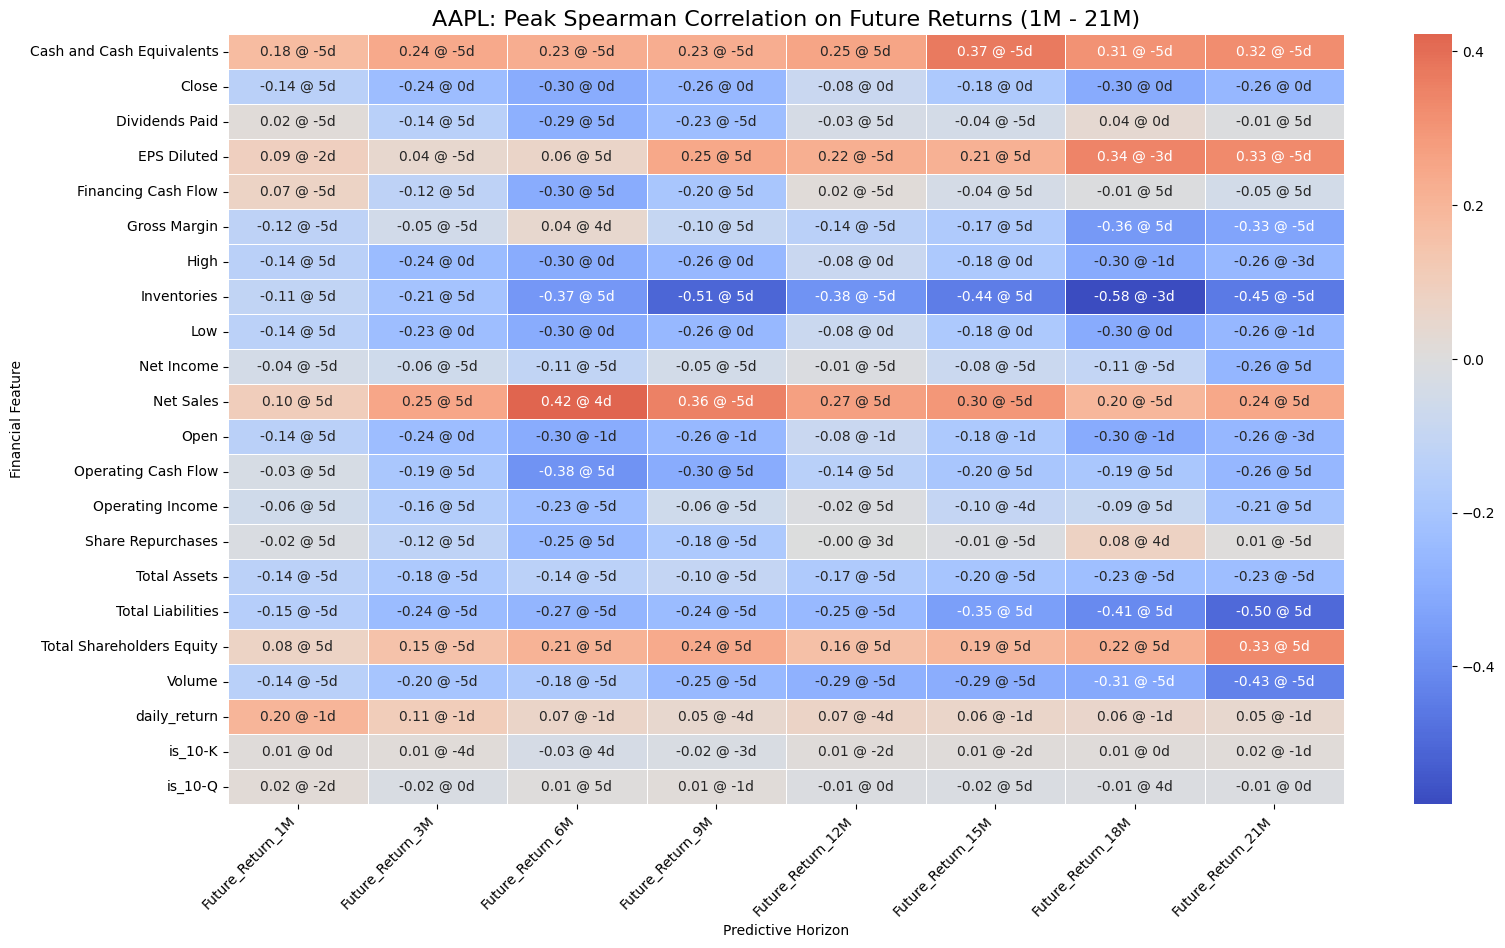

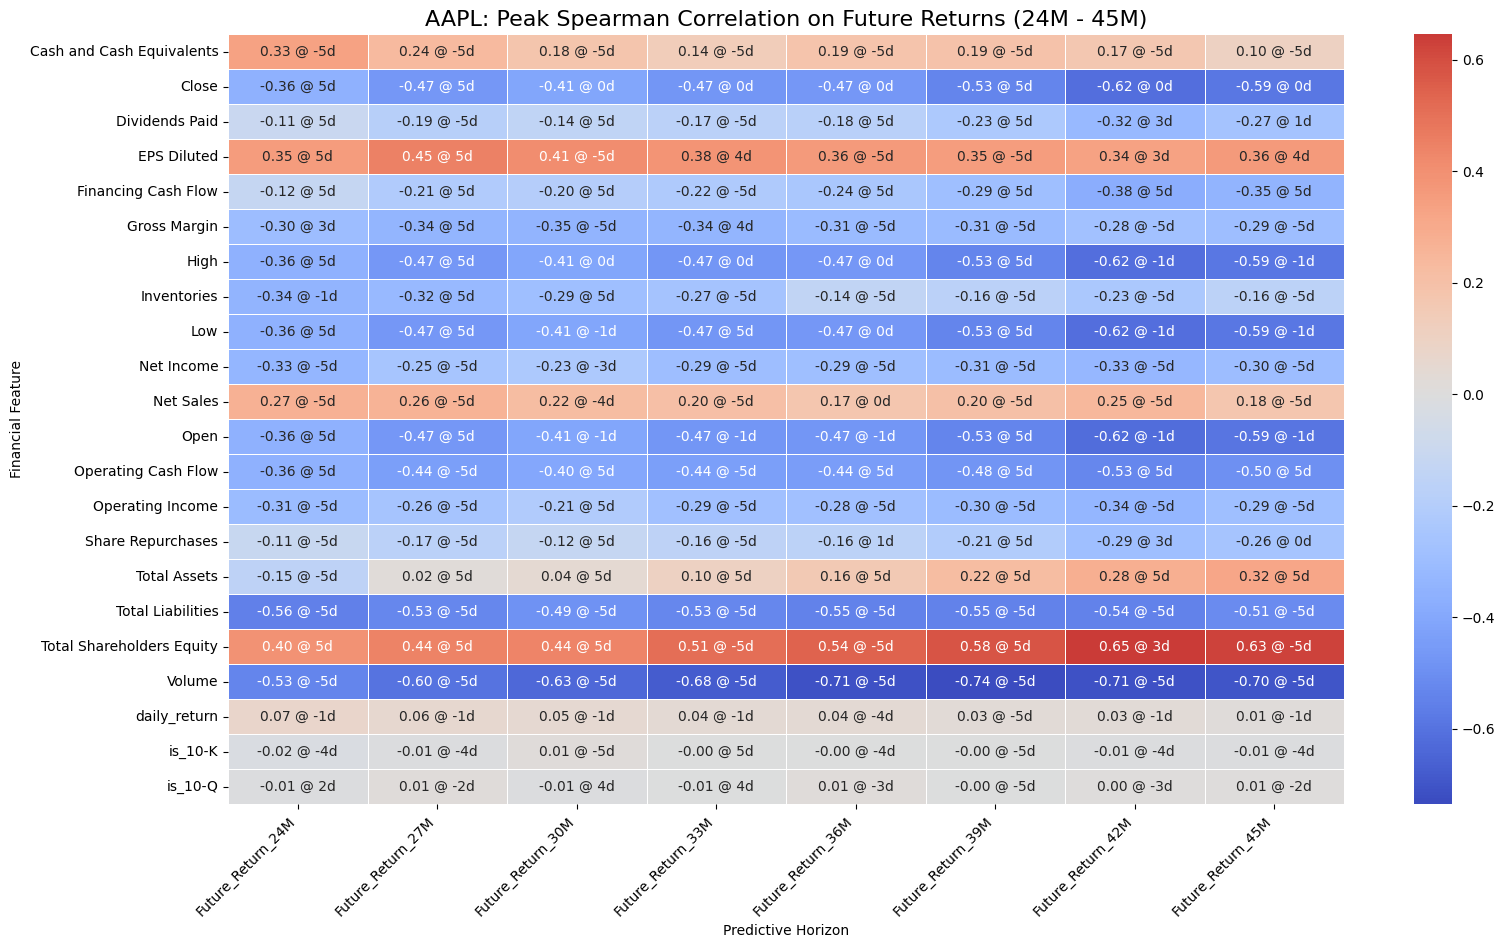

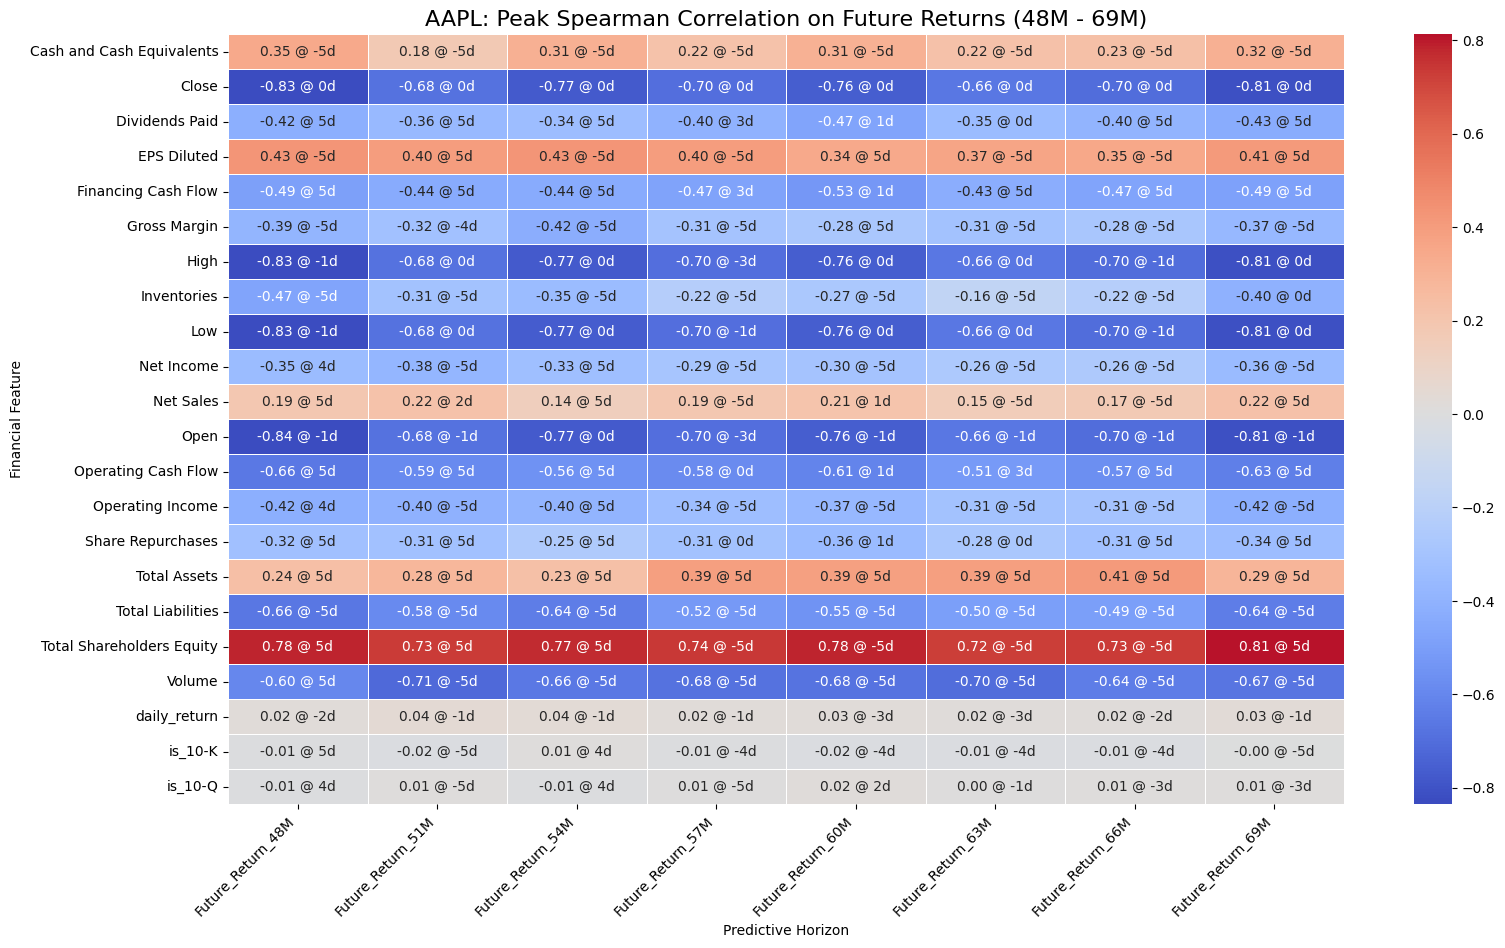

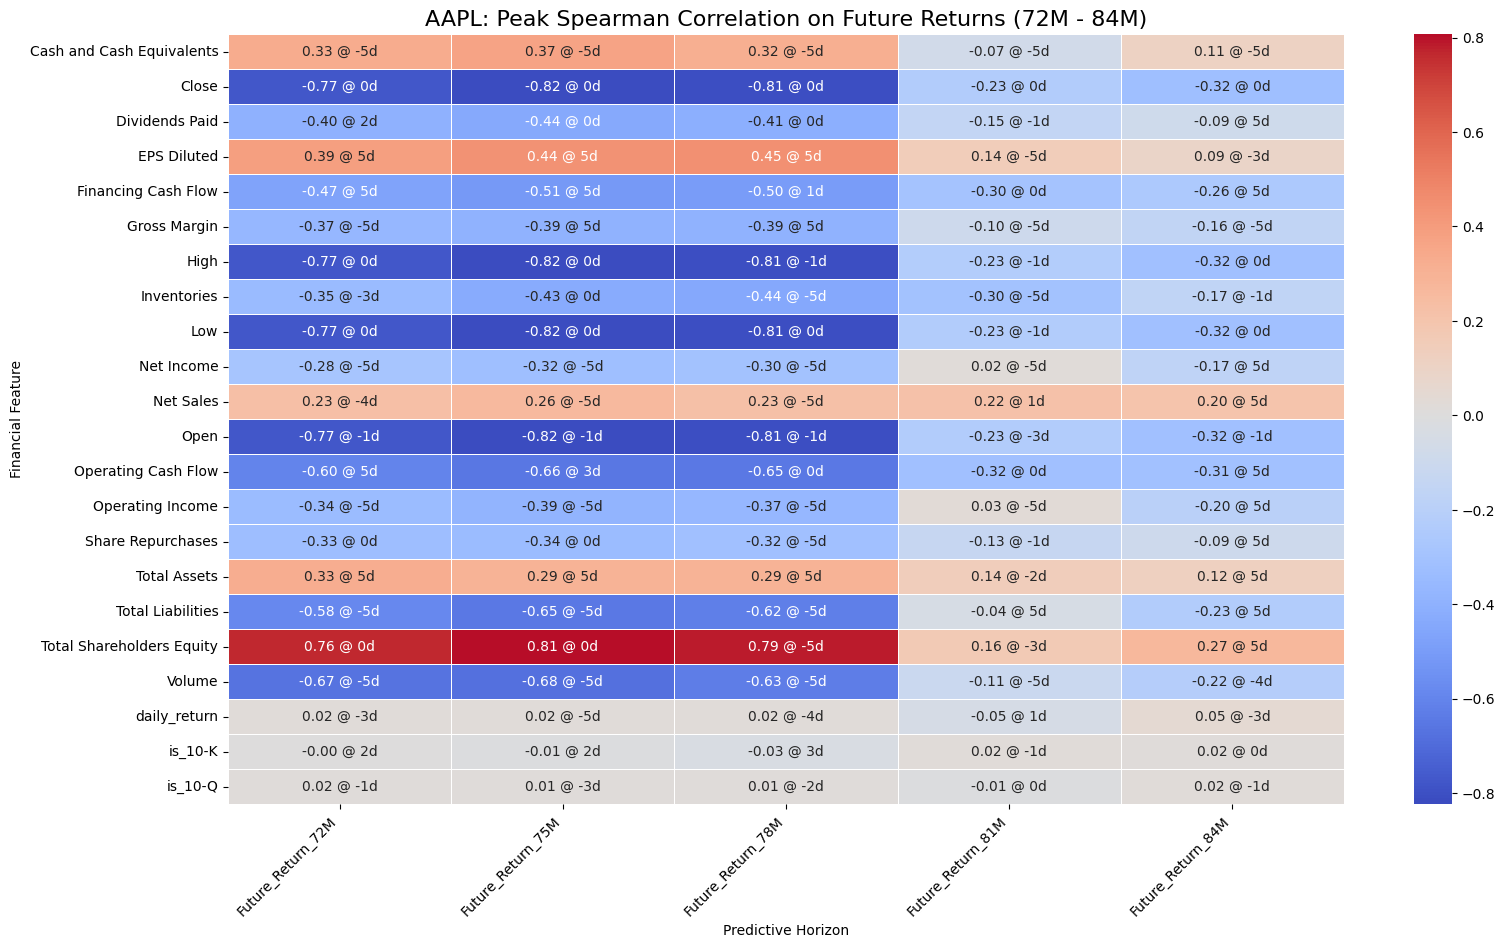

--- Generating Return Heatmaps for NVDA ---


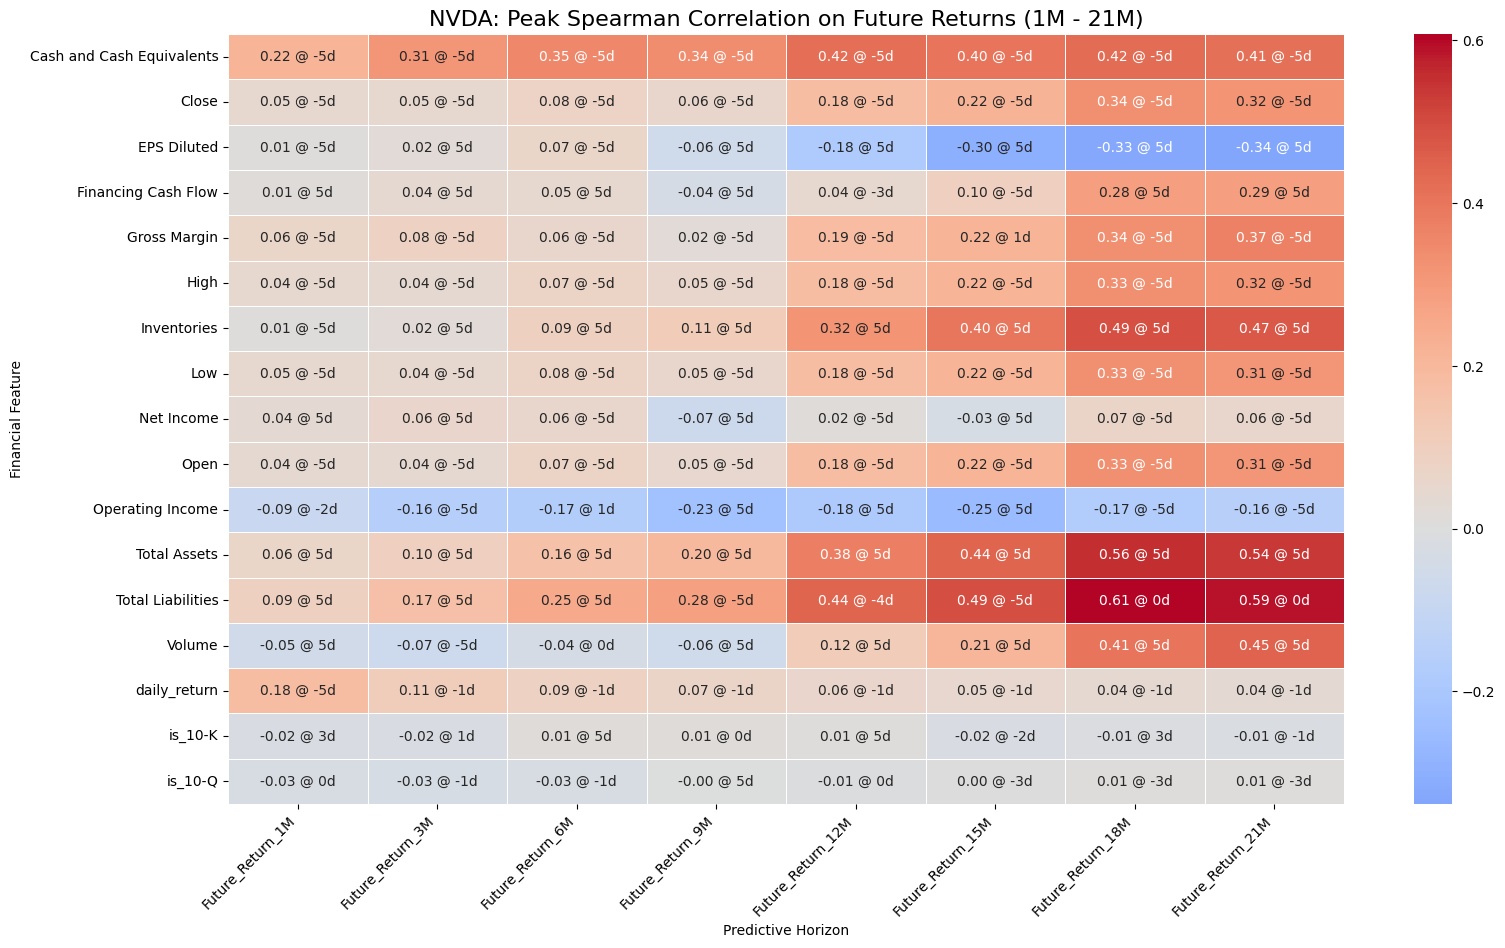

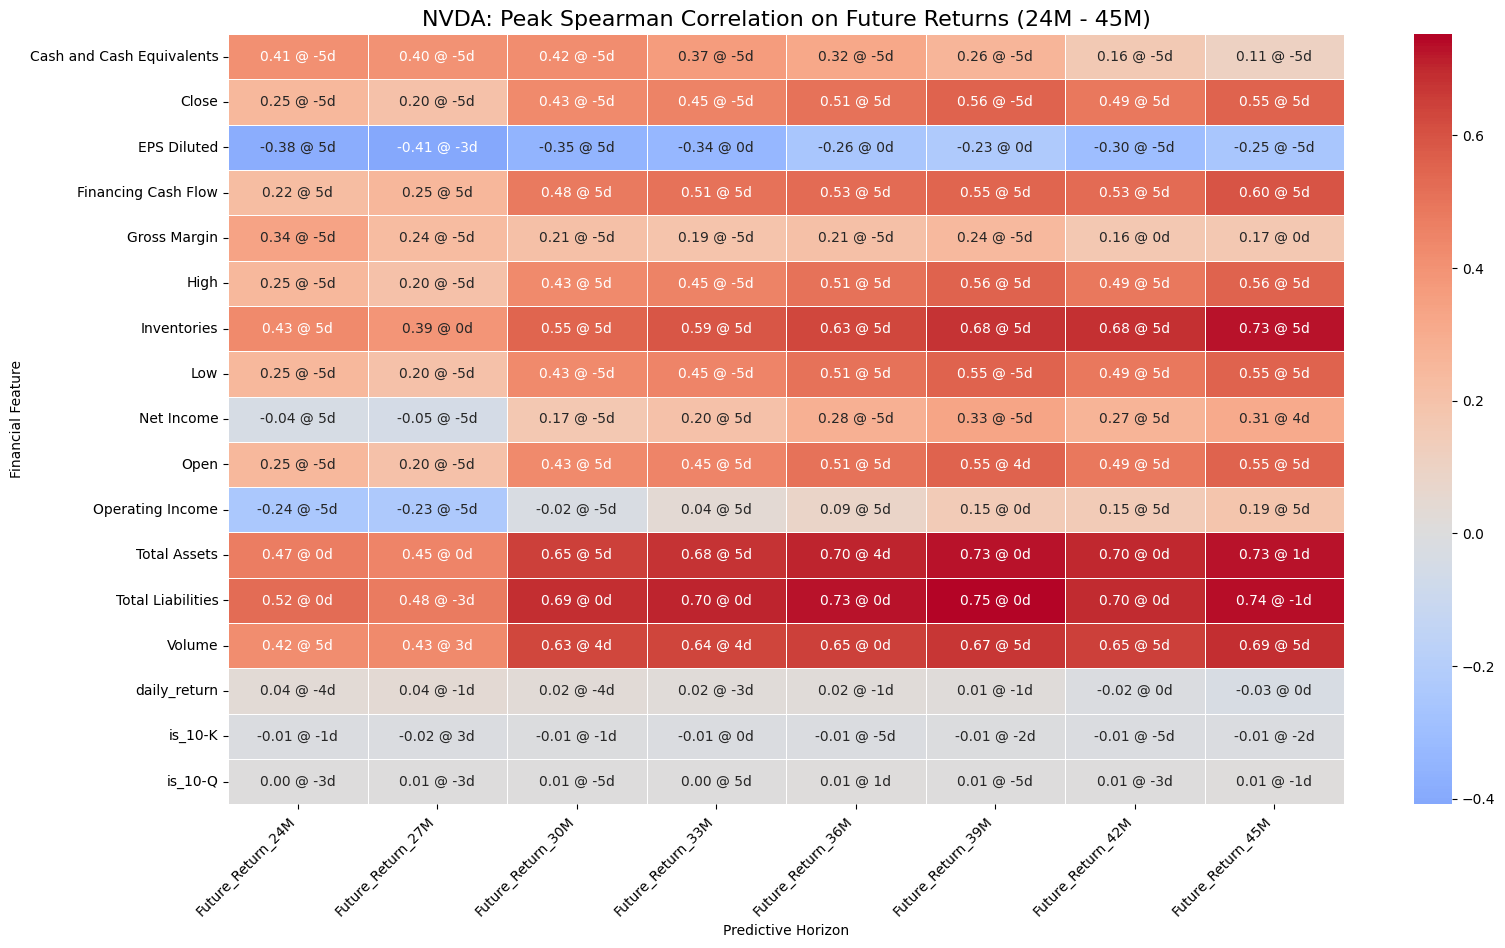

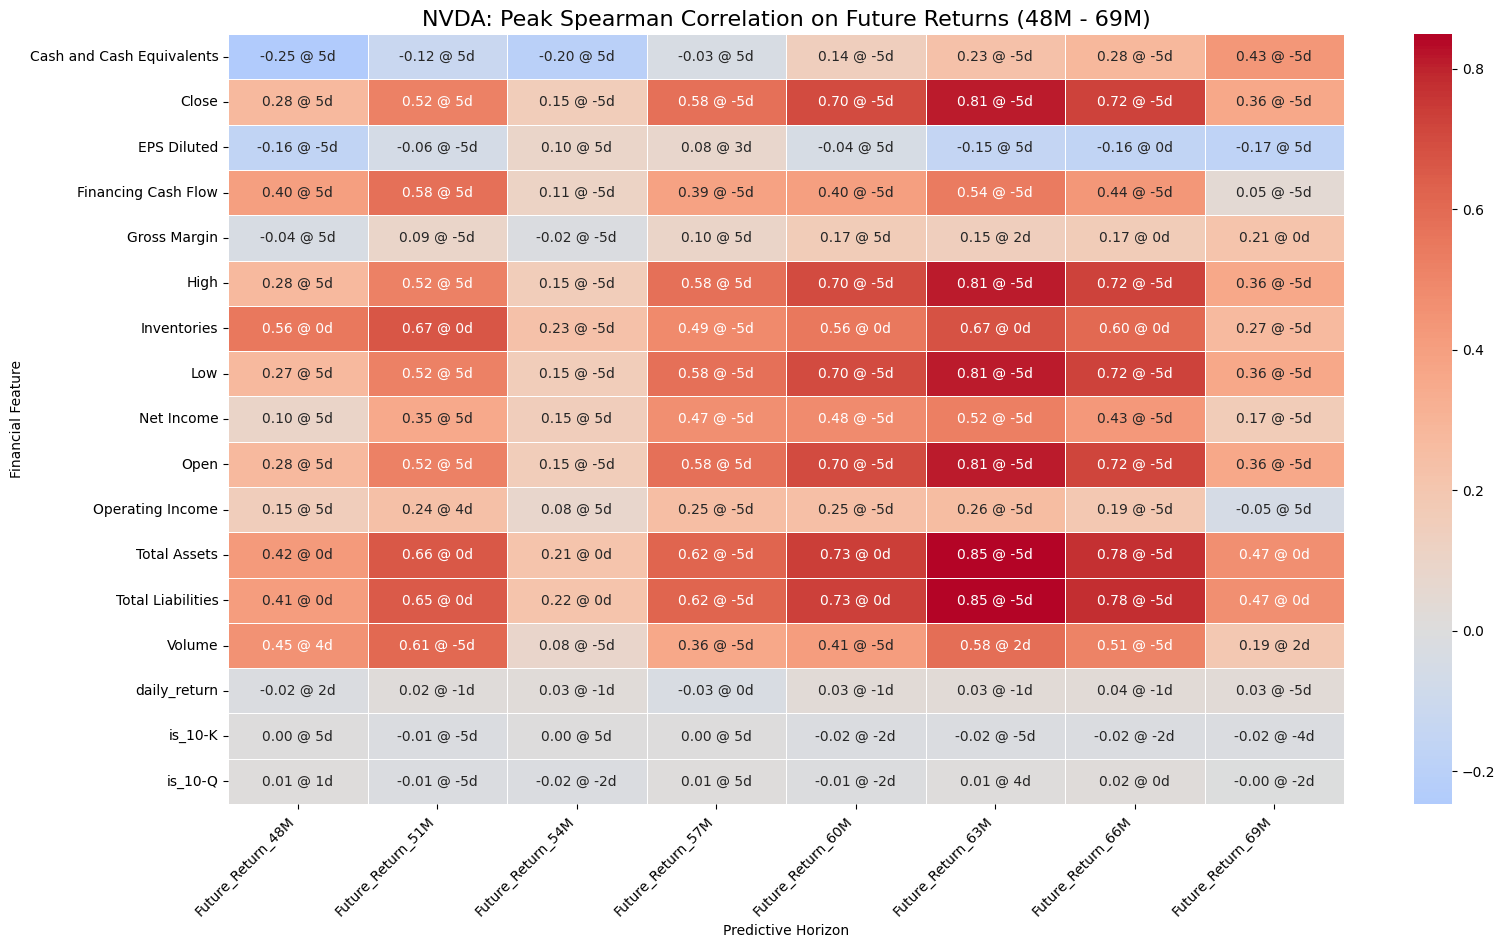

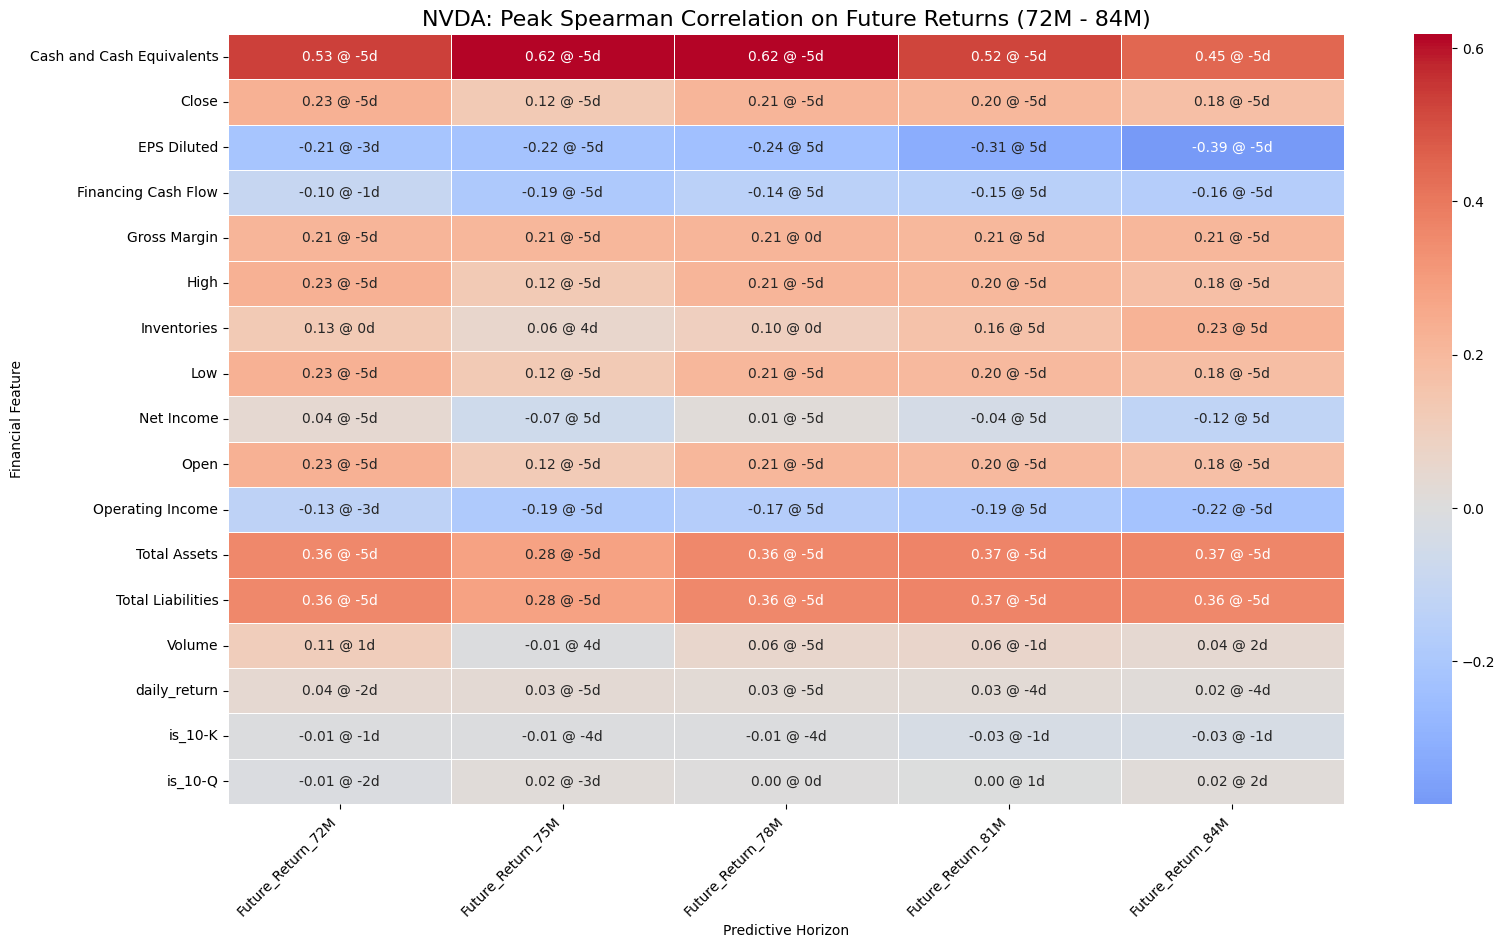

--- Generating Return Heatmaps for GOOGL ---


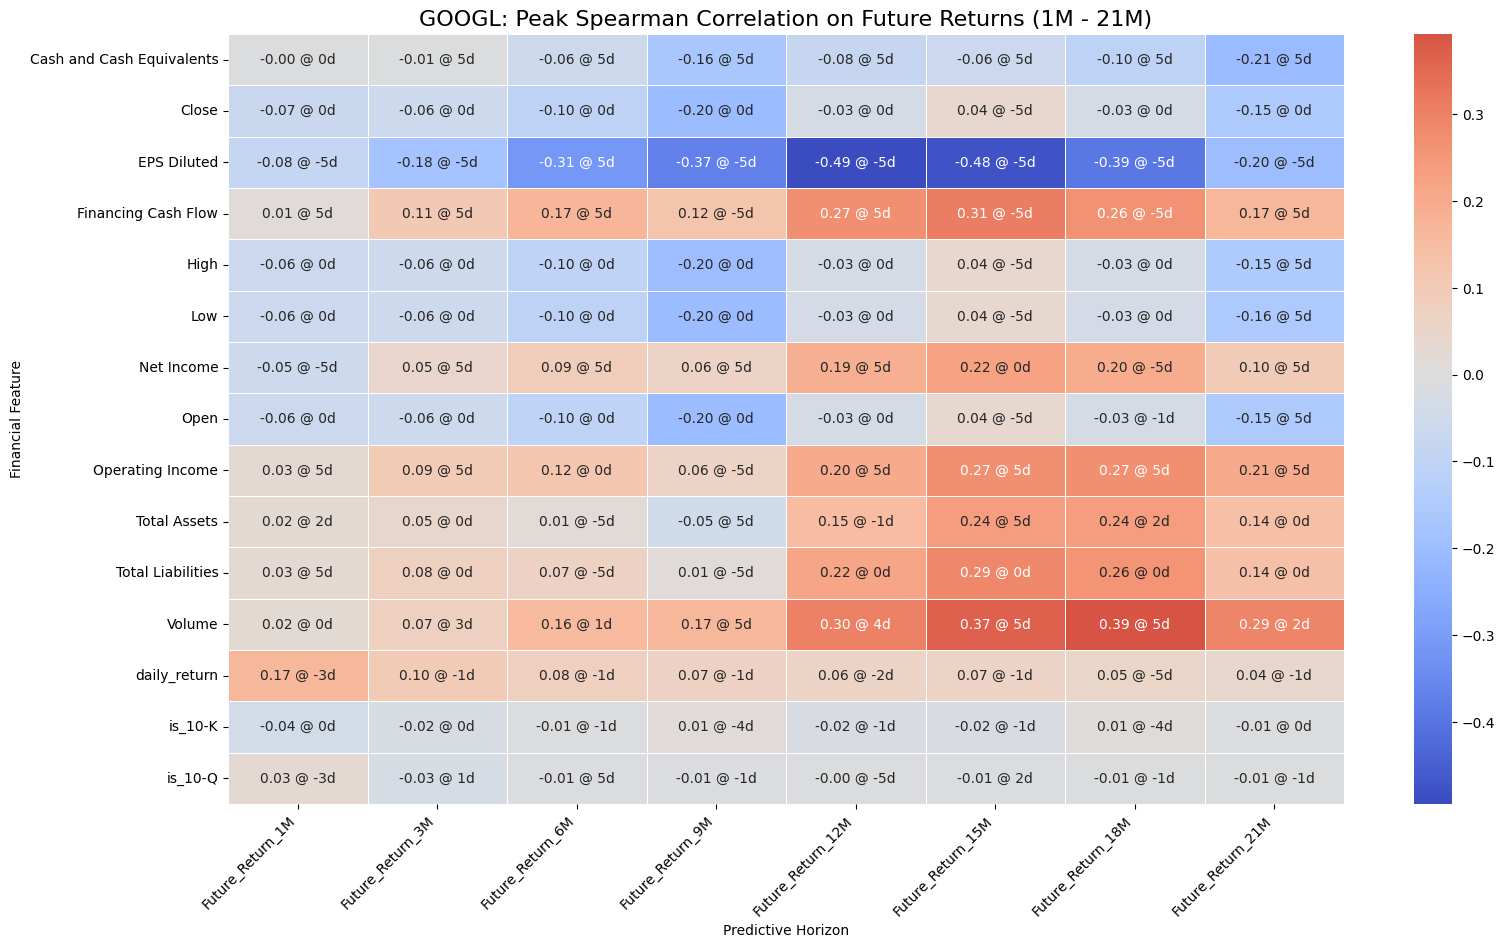

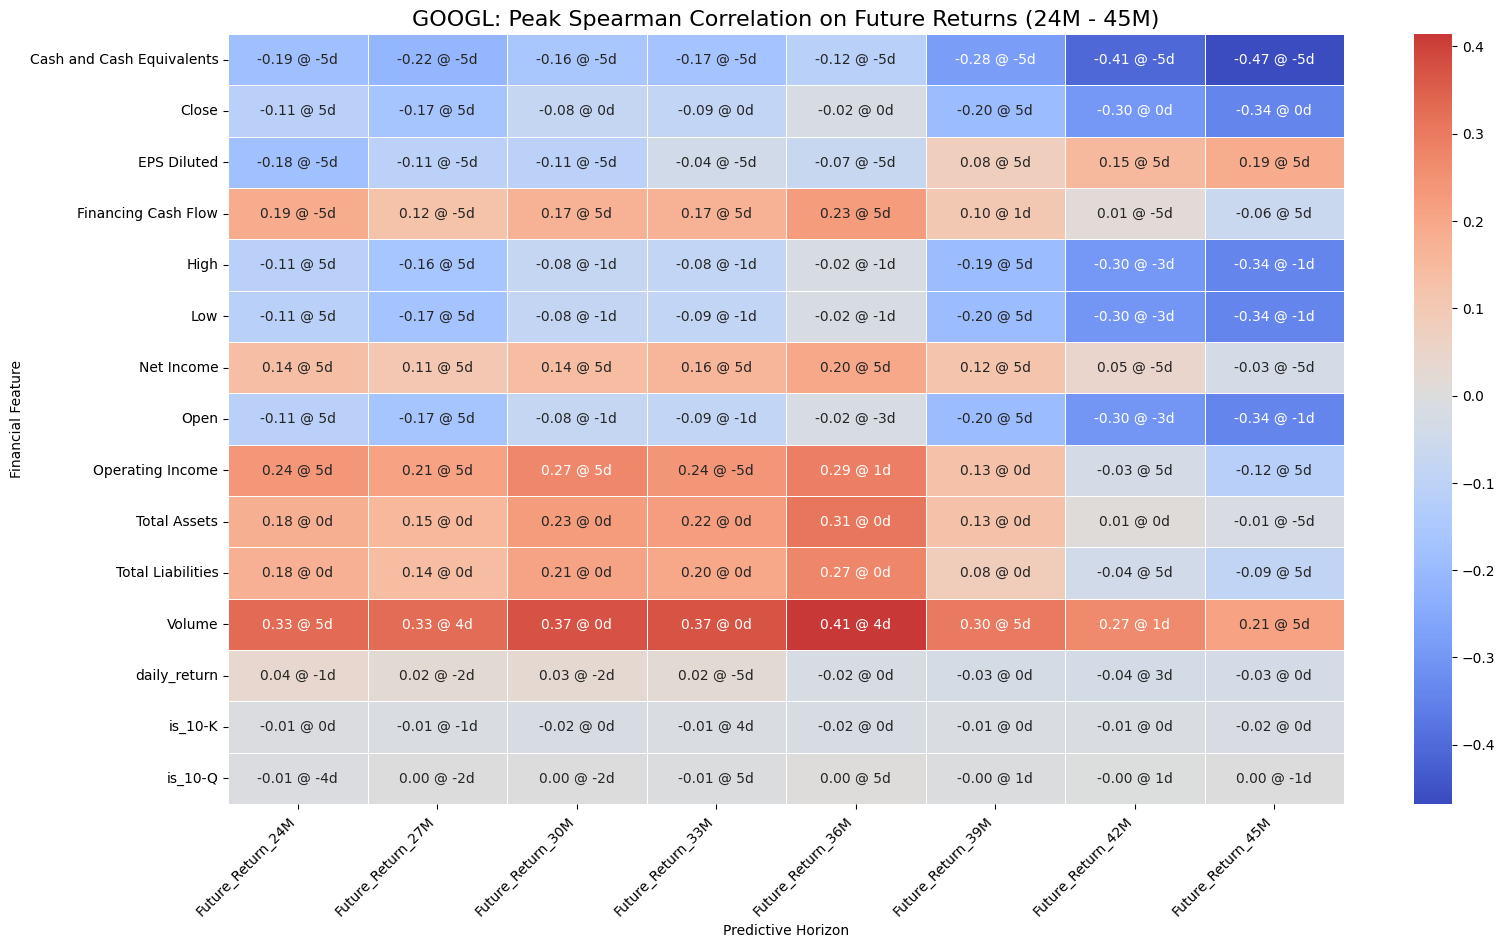

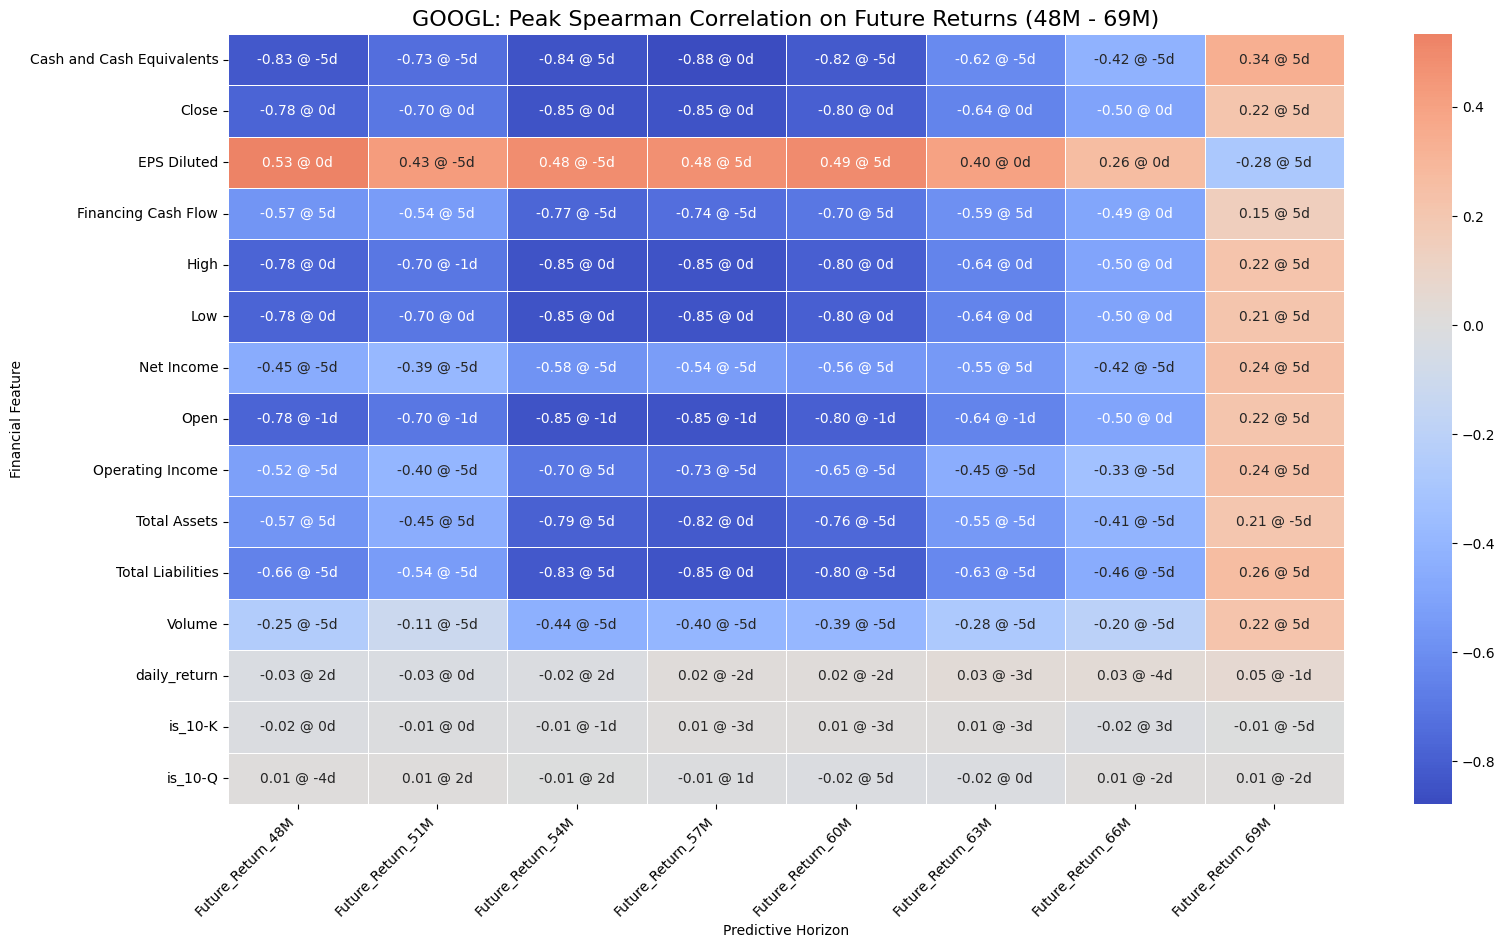

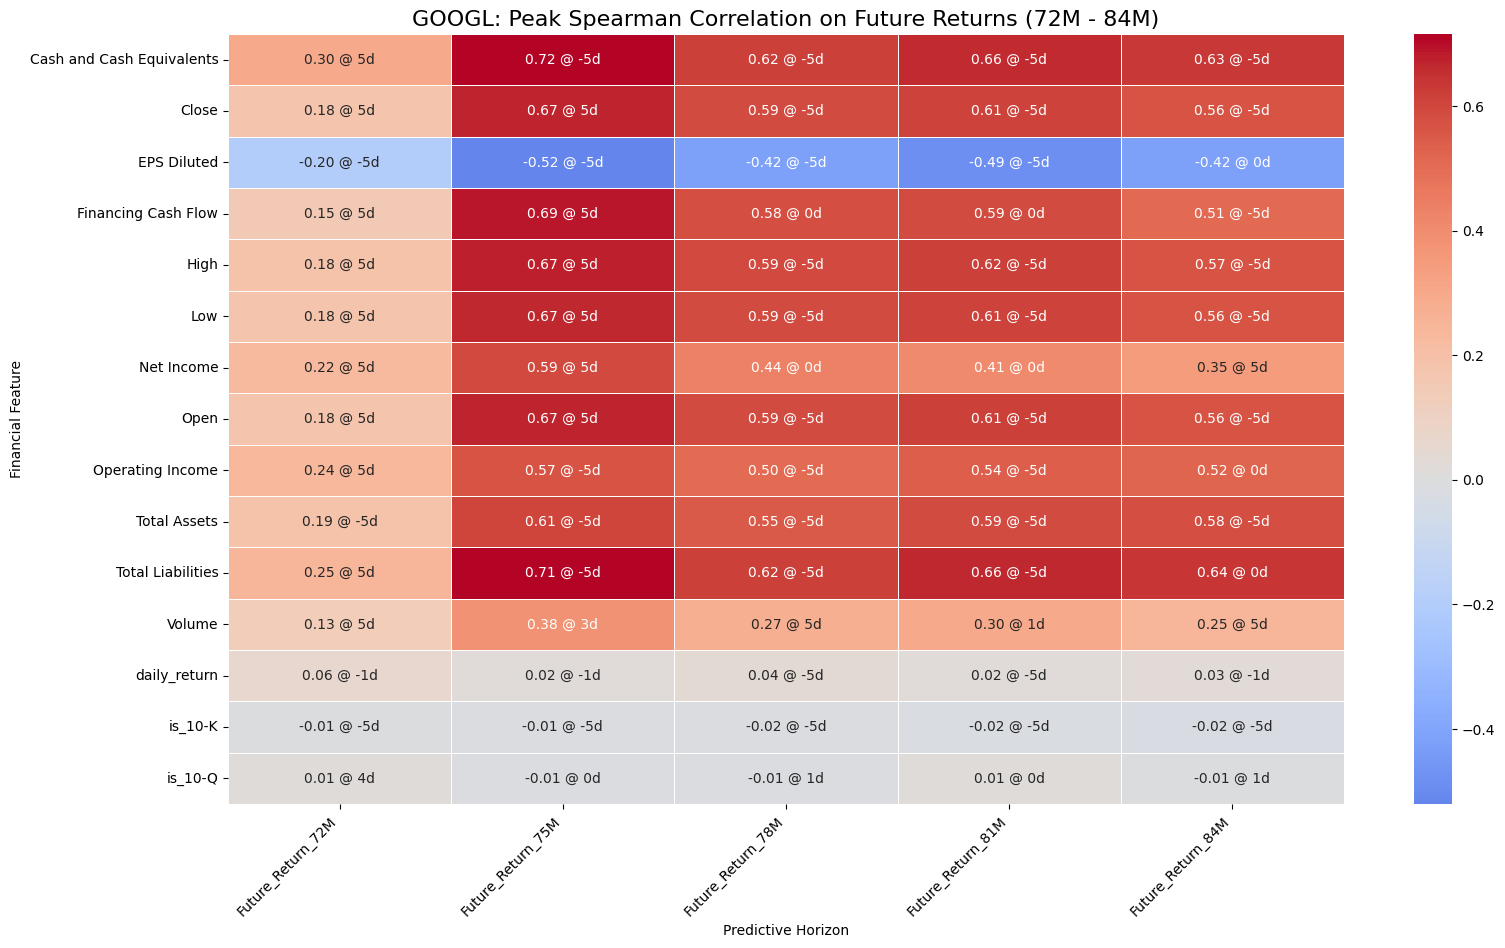

In [38]:
print("3.6: Generating peak correlation heatmaps for Future Returns.")
print("-" * 30)

# Define the horizon groups based on 2-year intervals (24 months)
# 1M + 8*3M = 25 months ~= 2 years
group_size = 8 
months = [1] + list(range(3, 85, 3))
num_groups = (len(months) + group_size - 1) // group_size

for ticker, results_df in corr_results.items():
    print(f"--- Generating Return Heatmaps for {ticker} ---")
    for i in range(num_groups):
        start_index = i * group_size
        end_index = start_index + group_size
        horizon_group_months = months[start_index:end_index]
        
        if not horizon_group_months:
            continue

        # Create the target names for the current group
        horizon_group_targets = [f'Future_Return_{m}M' for m in horizon_group_months]
        
        start_month = horizon_group_months[0]
        end_month = horizon_group_months[-1]

        plot_peak_correlation_heatmap(
            results_df[results_df['Target'].isin(horizon_group_targets)],
            target_filter='Future_Return',
            correlation_method='Spearman',
            title=f'{ticker}: Peak Spearman Correlation on Future Returns ({start_month}M - {end_month}M)',
            figsize=(18, 10),
            annot_kws={"size": 10}
        )

3.7: Generating peak correlation heatmaps for Future Volatility.
------------------------------
--- Generating Volatility Heatmaps for AAPL ---


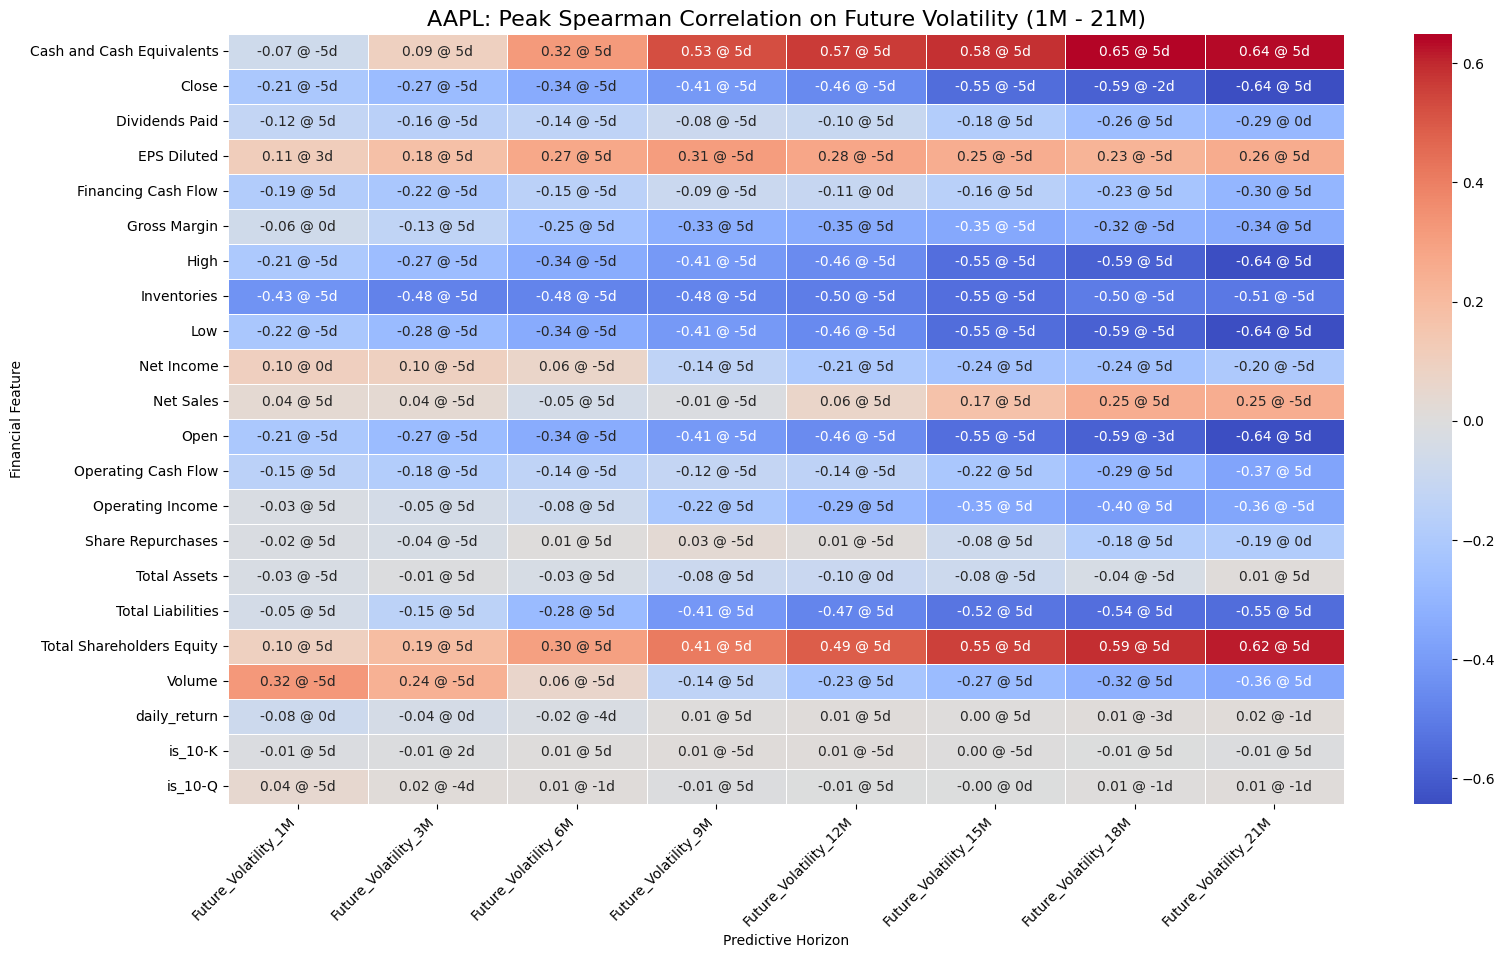

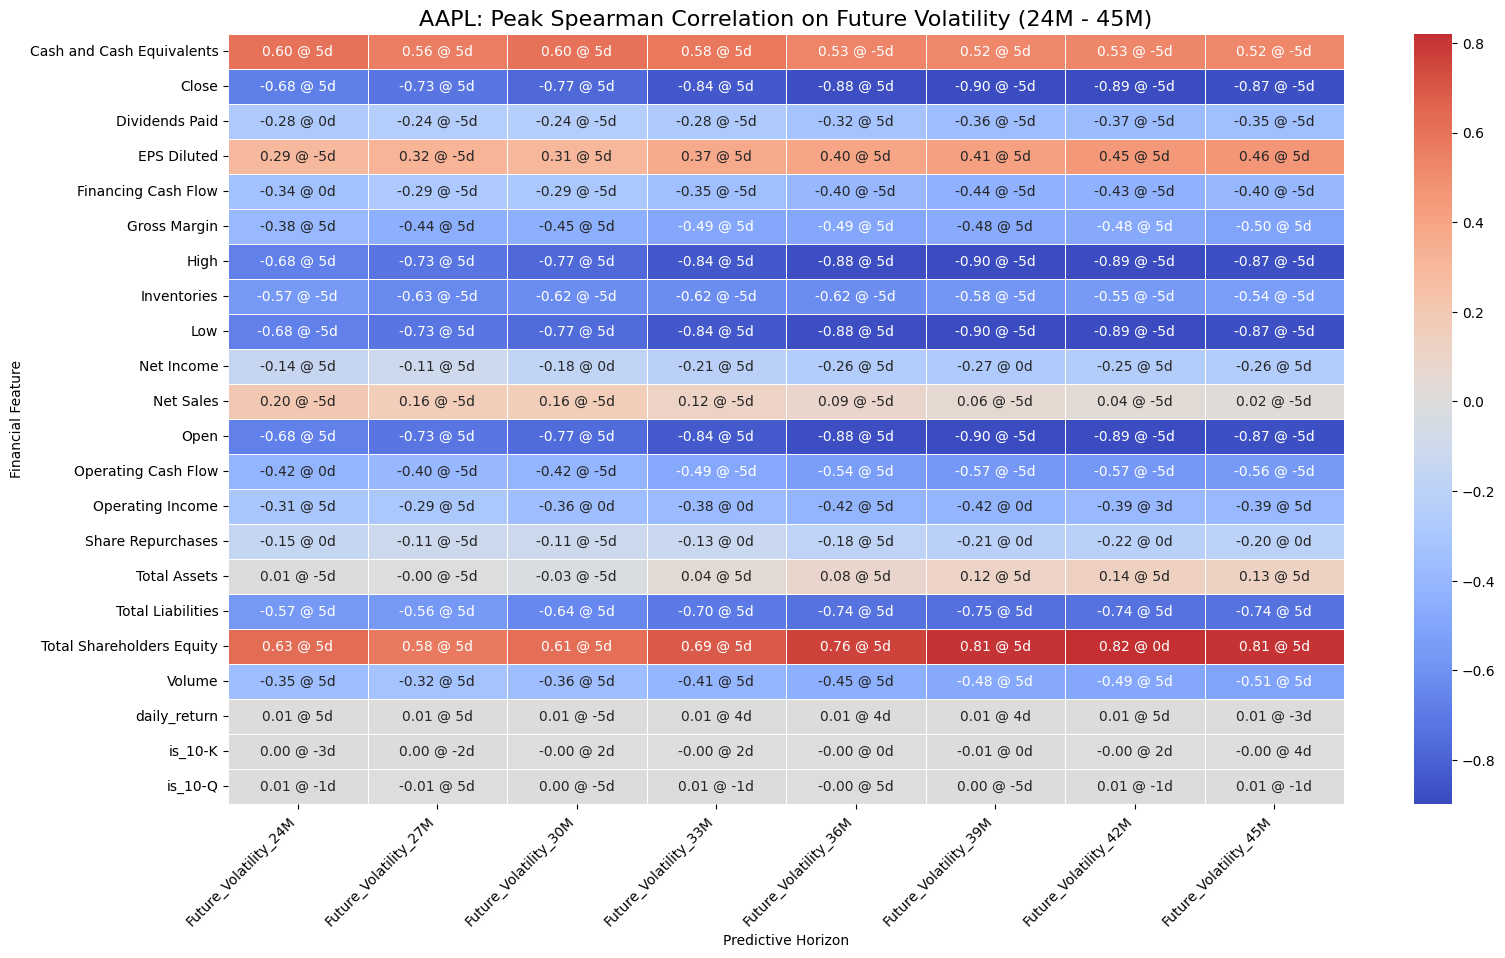

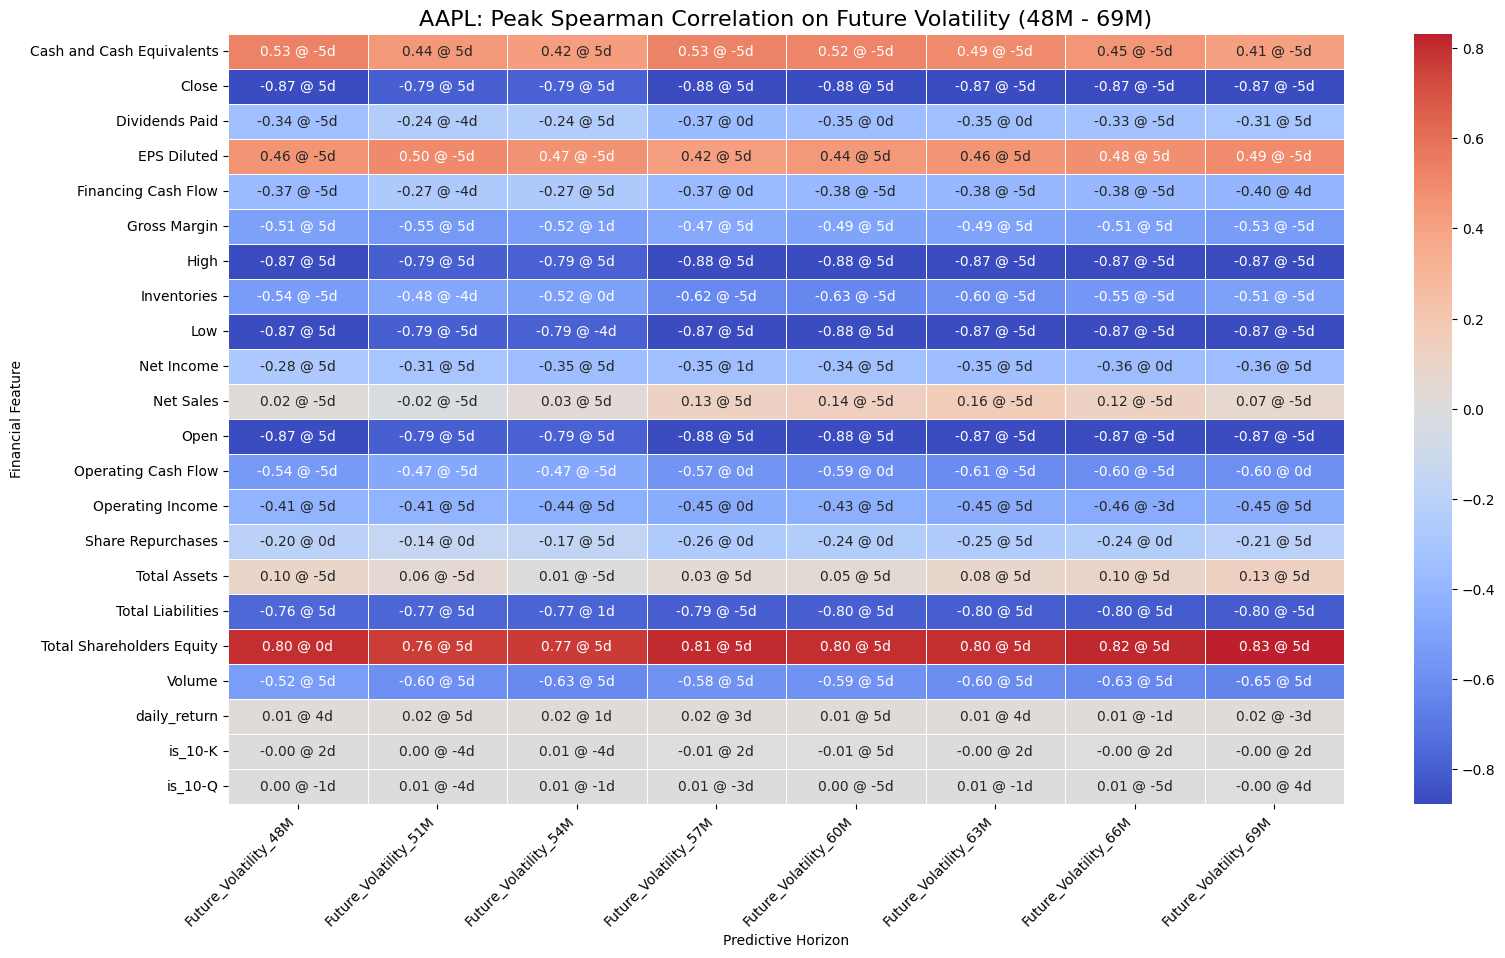

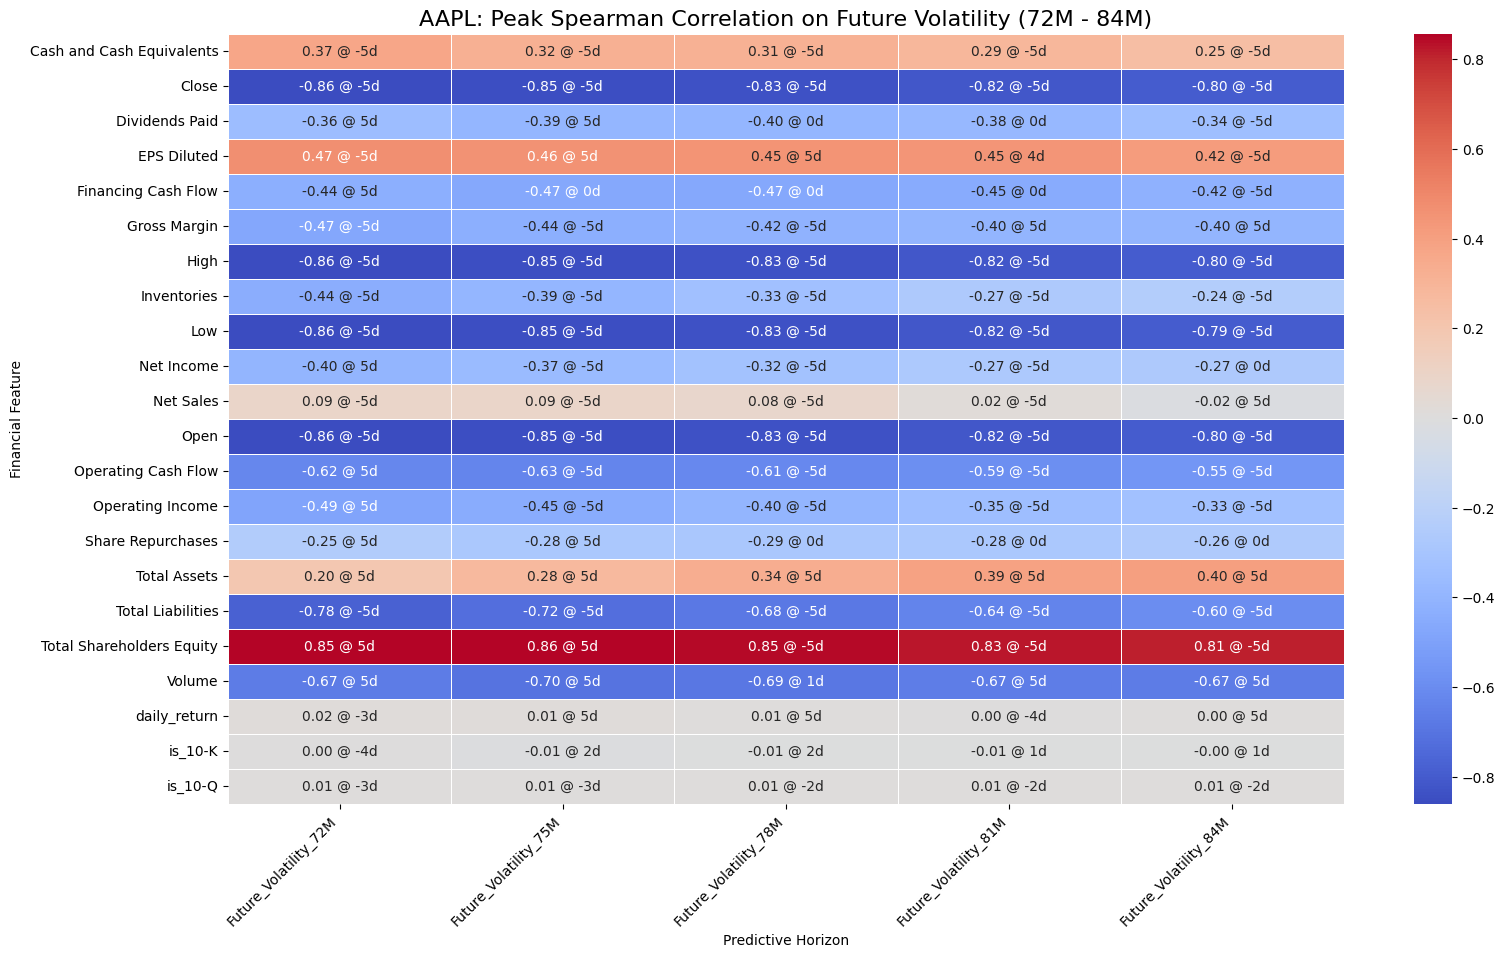

--- Generating Volatility Heatmaps for NVDA ---


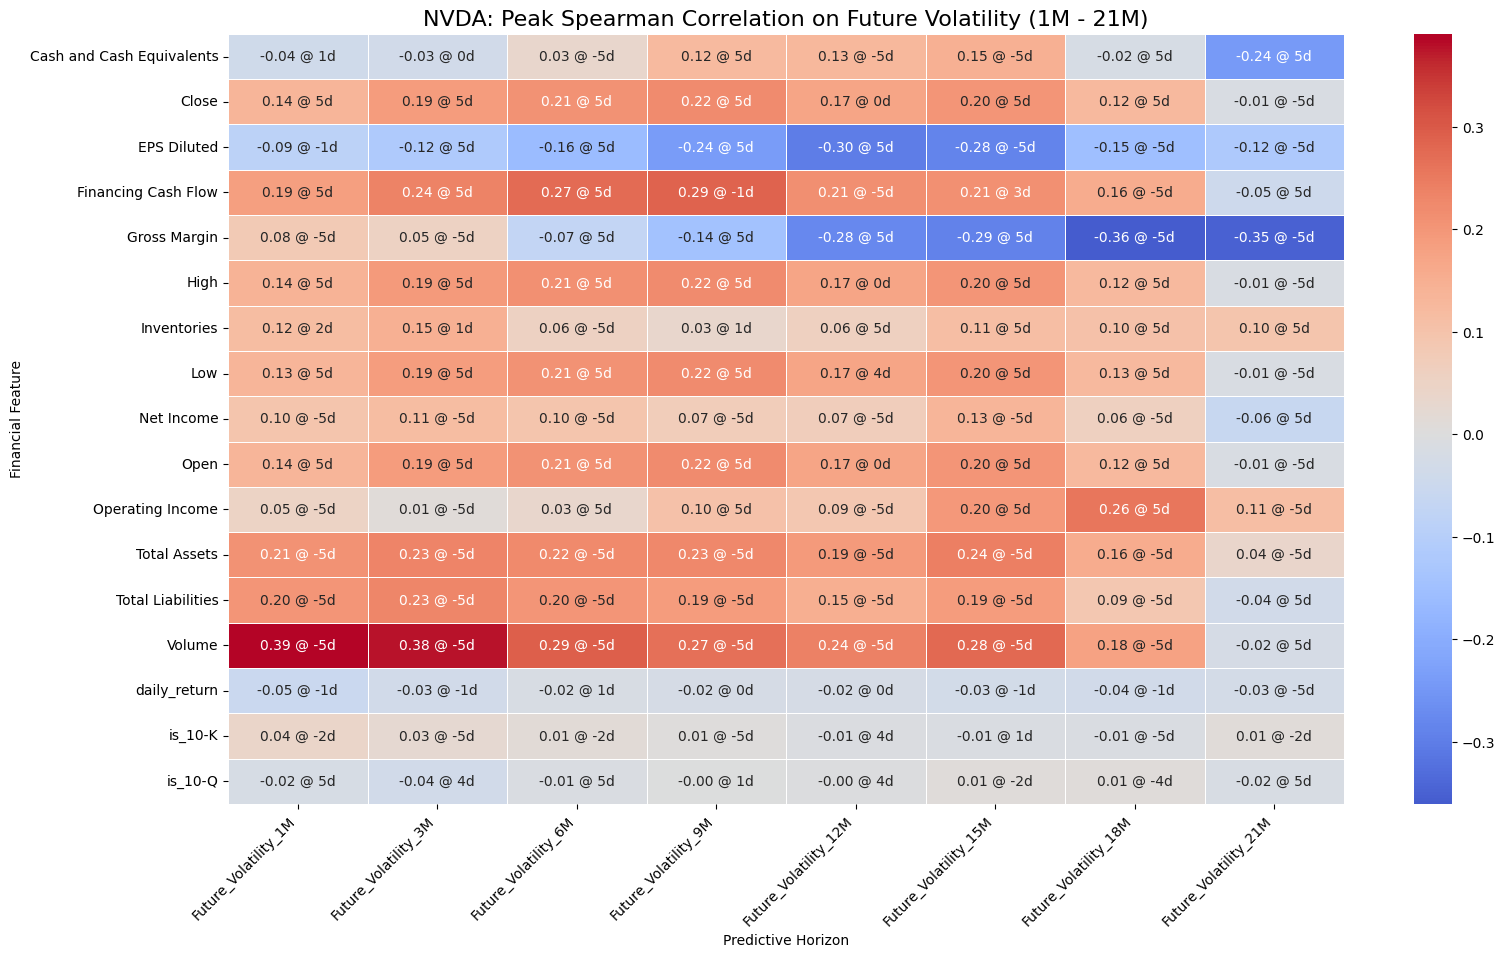

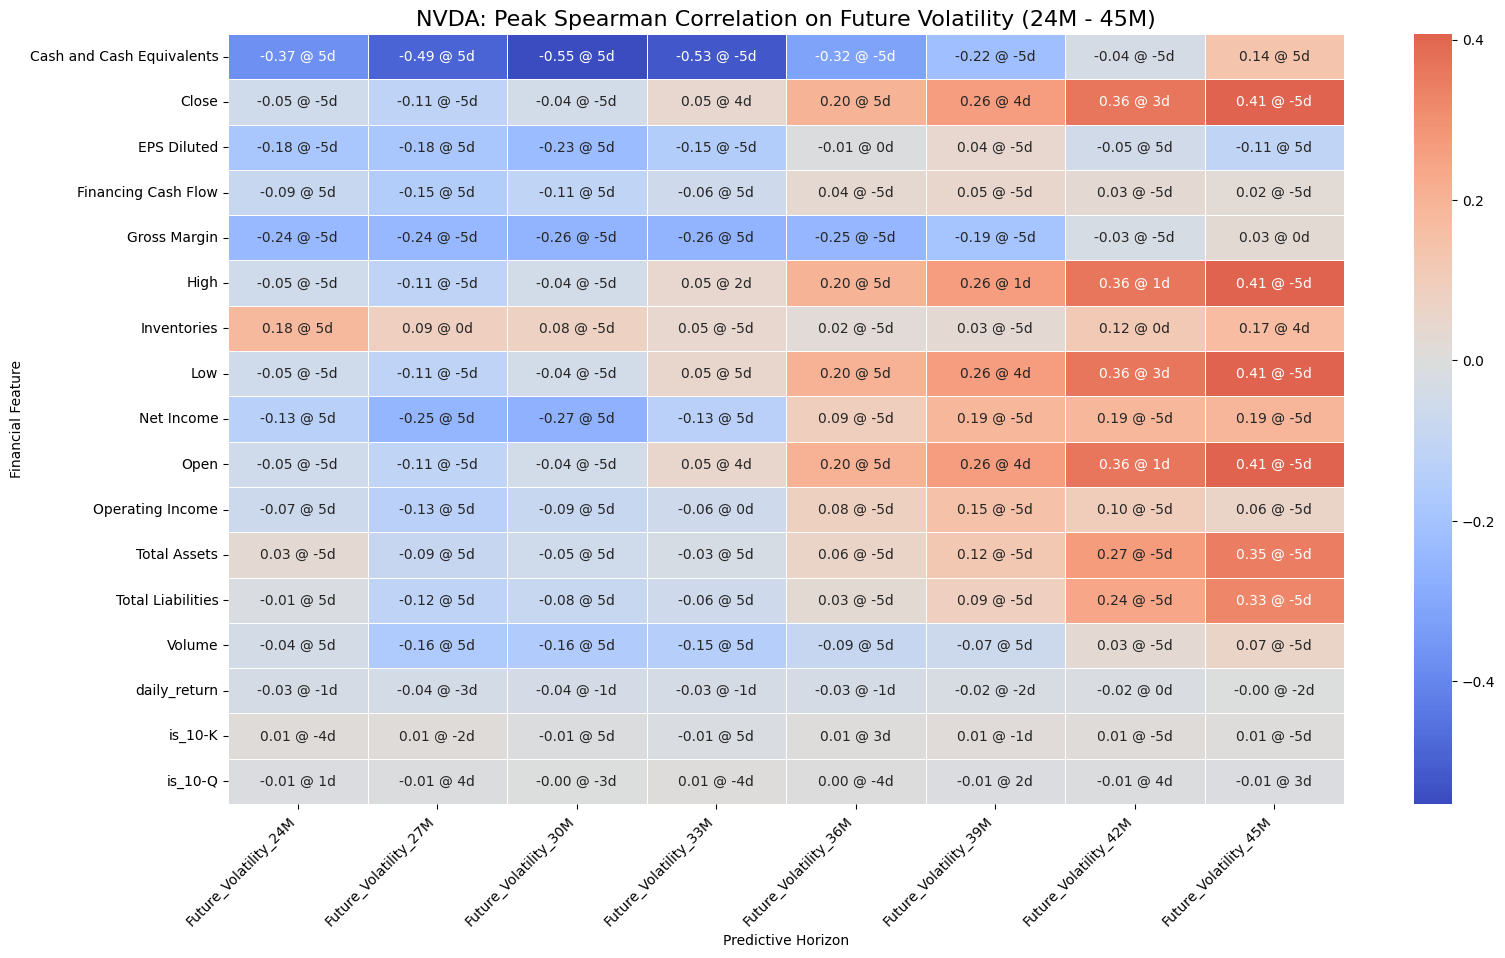

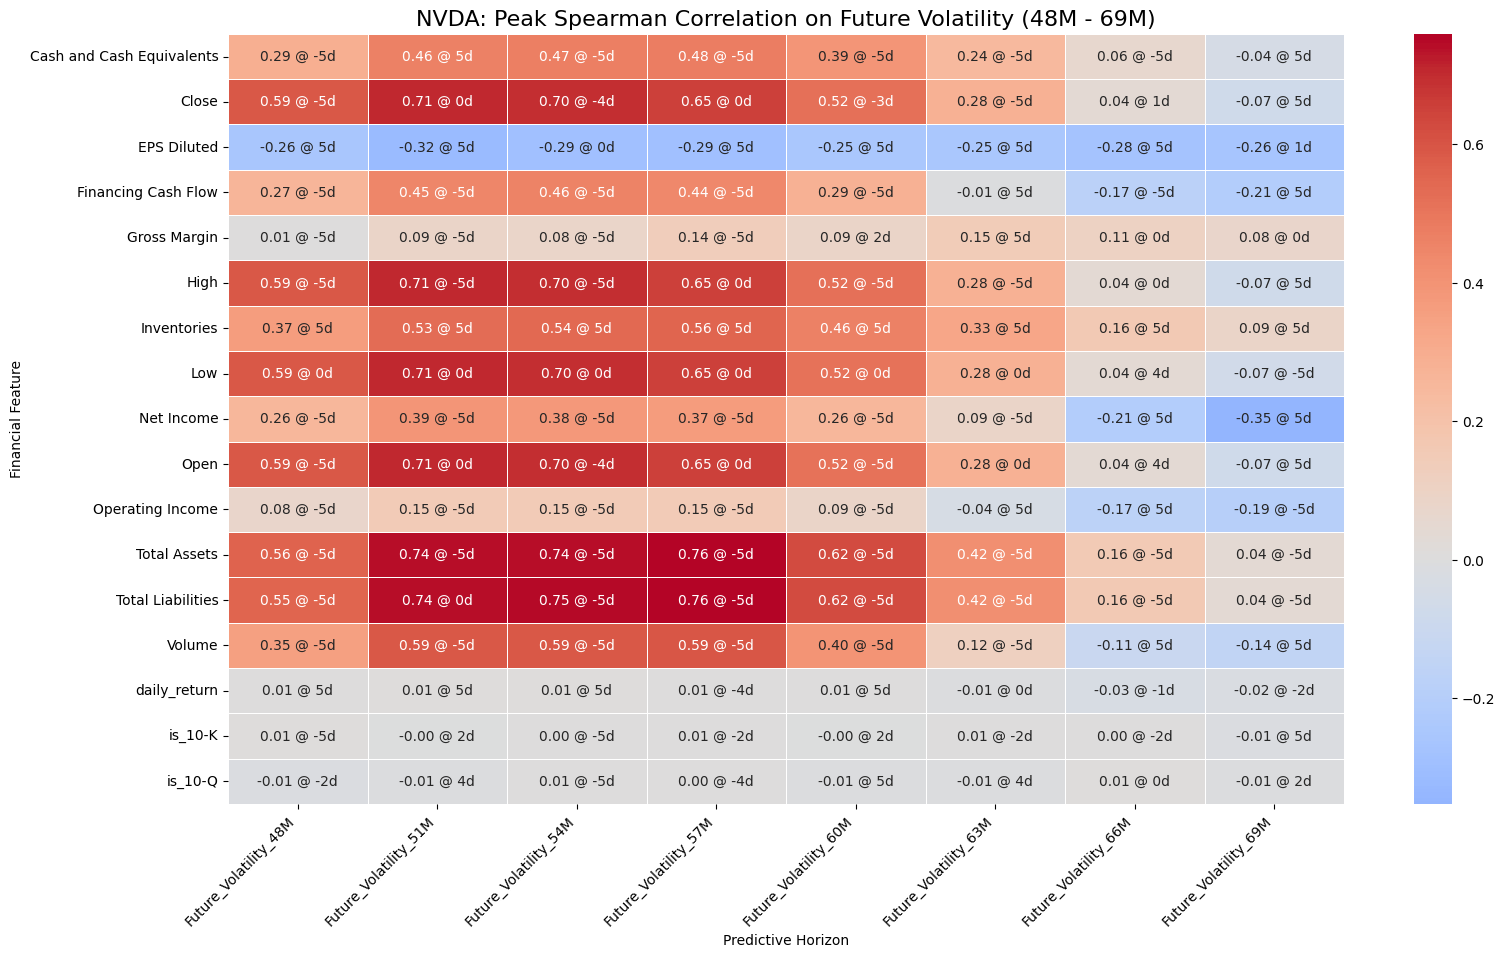

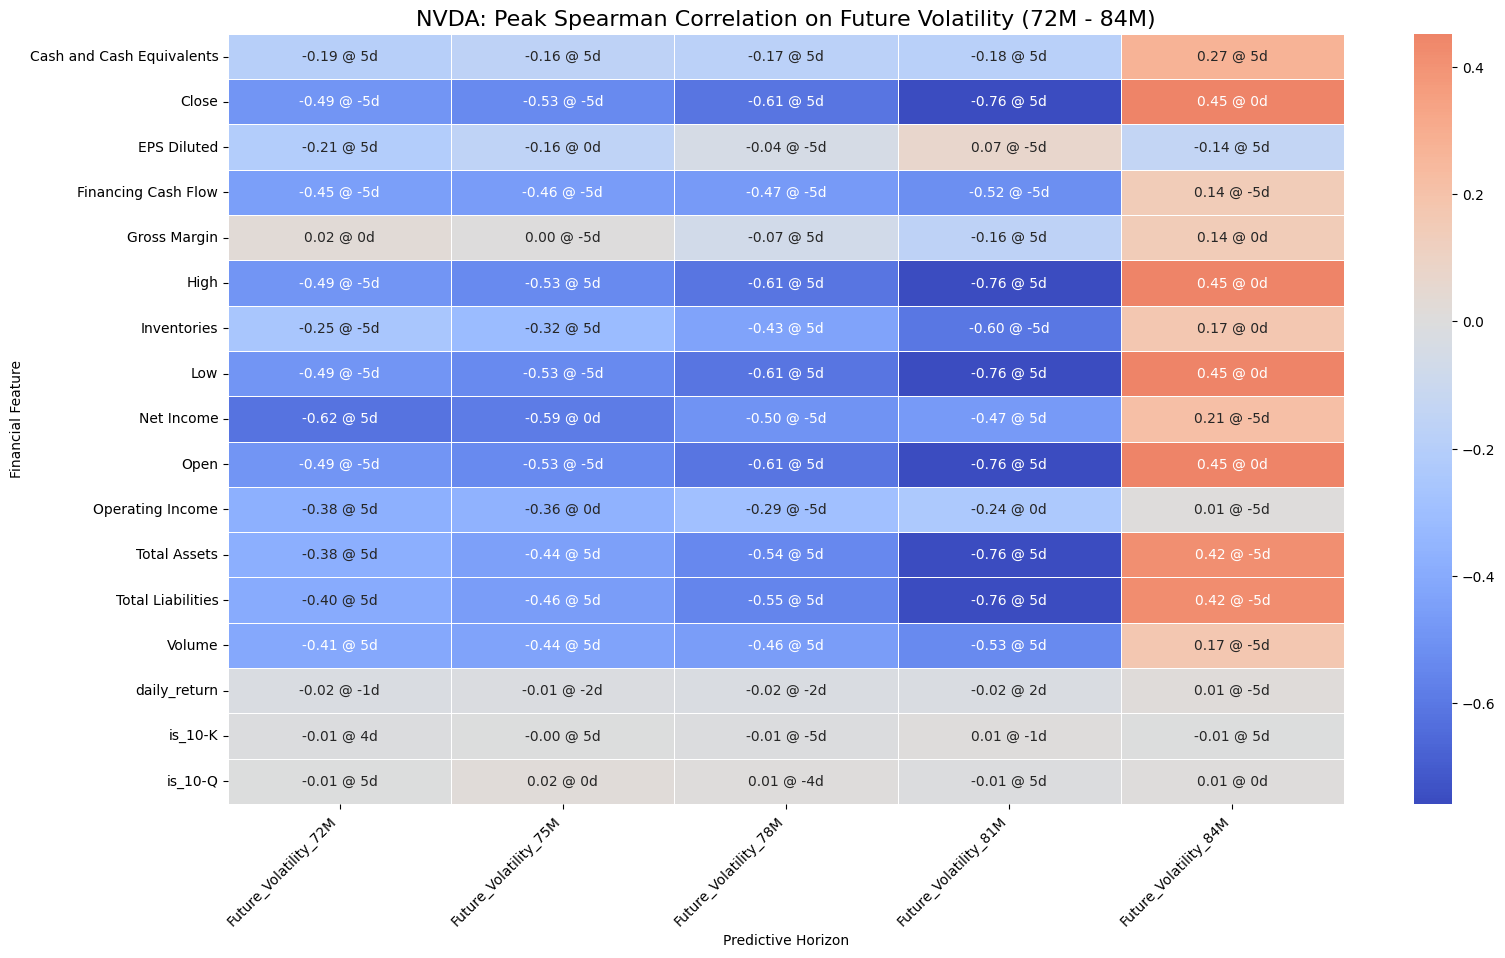

--- Generating Volatility Heatmaps for GOOGL ---


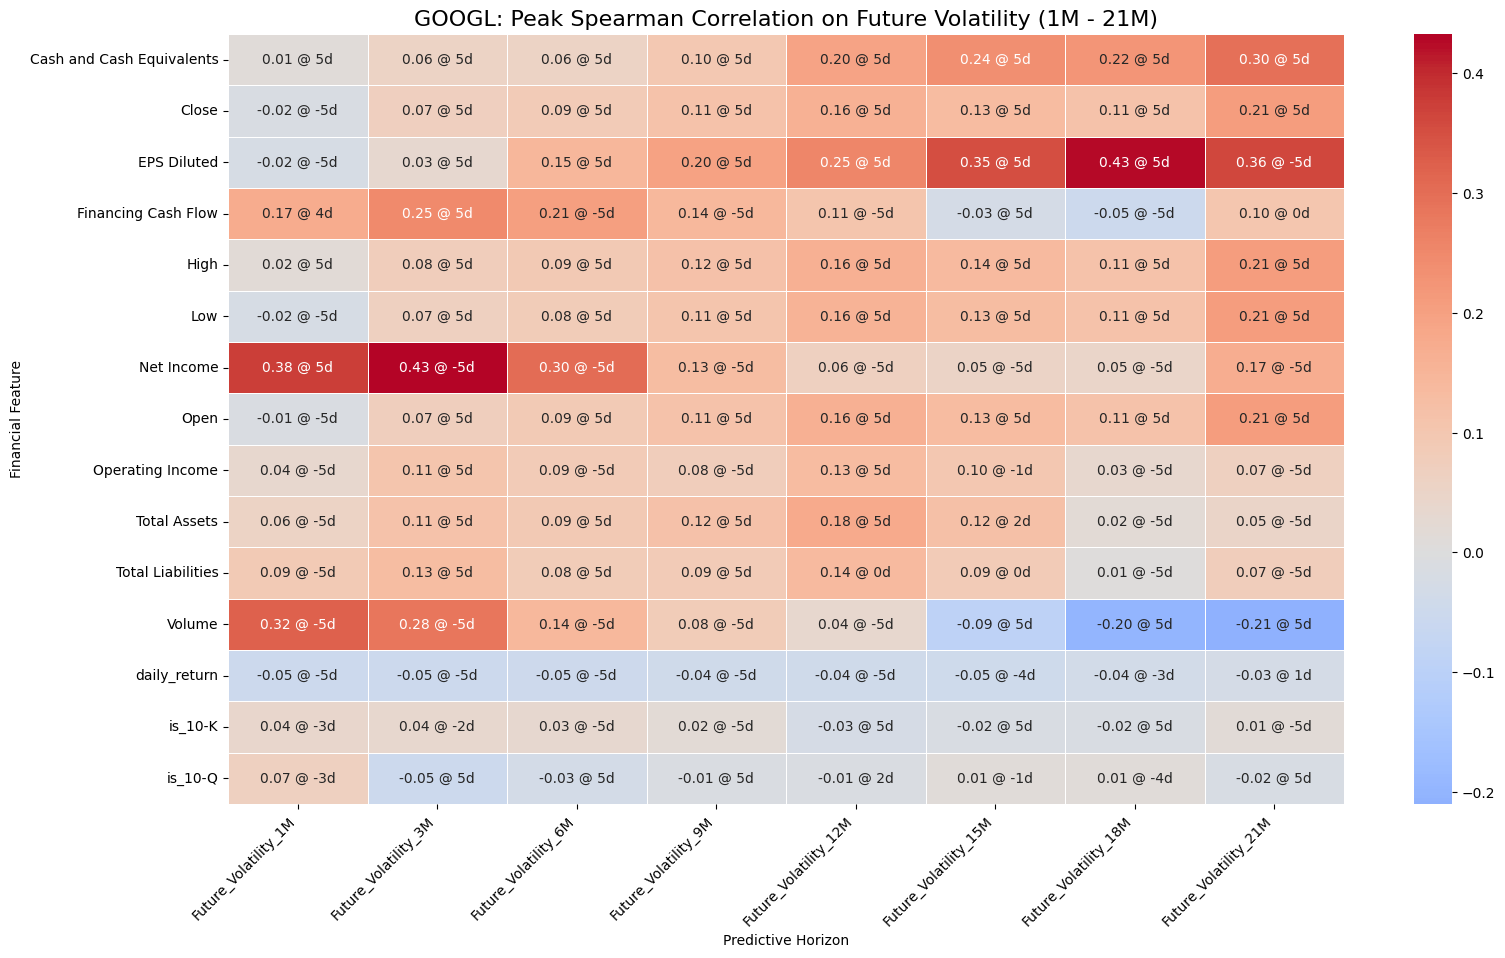

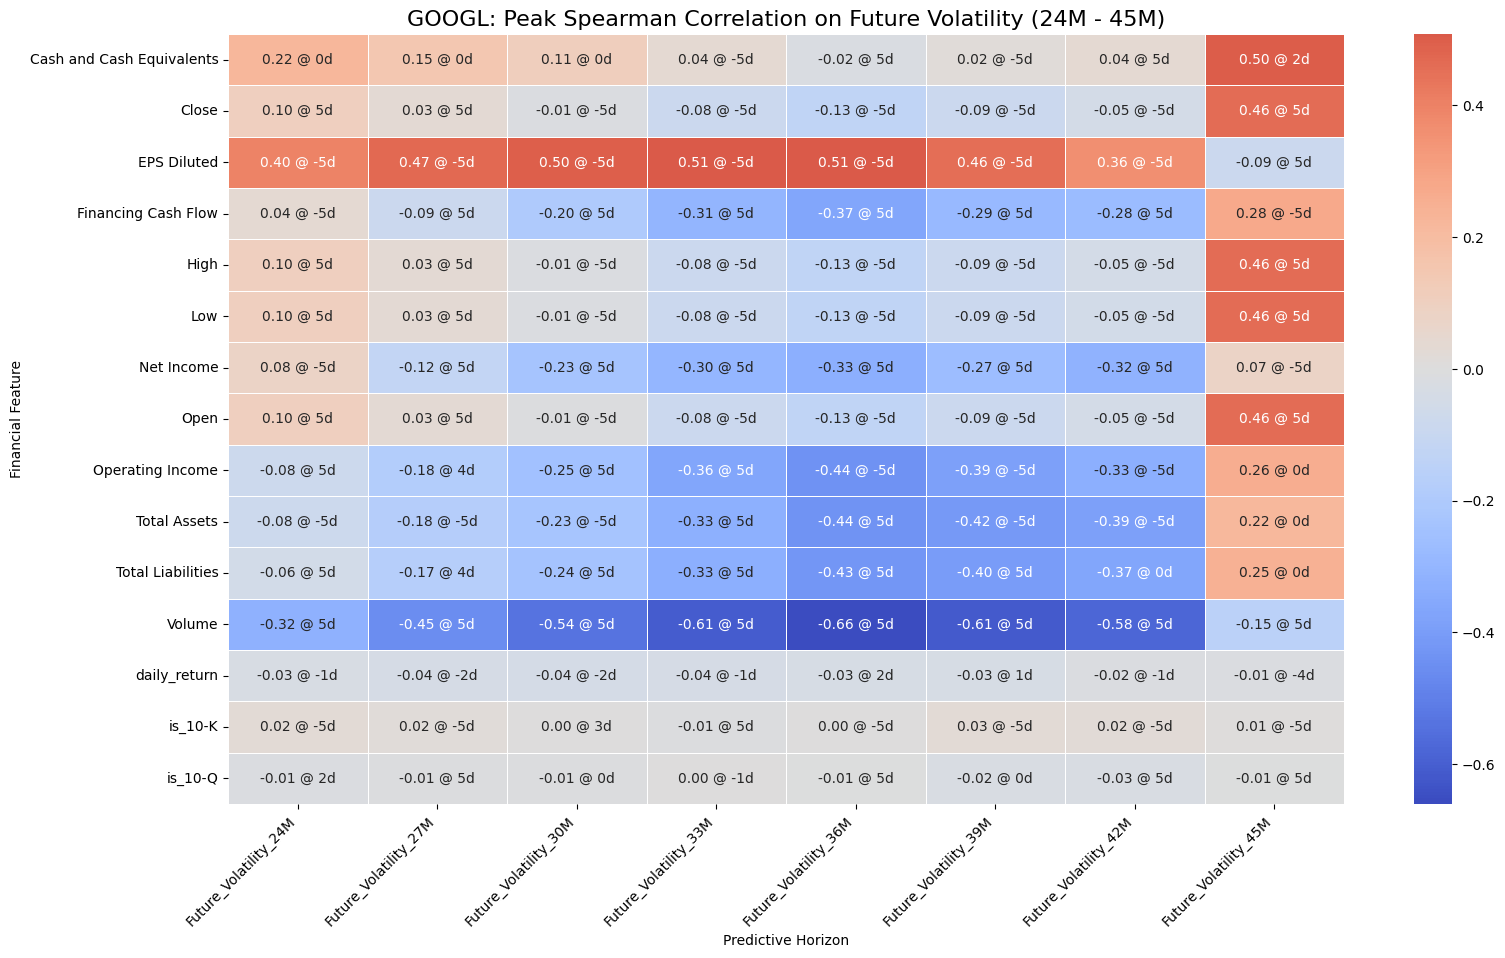

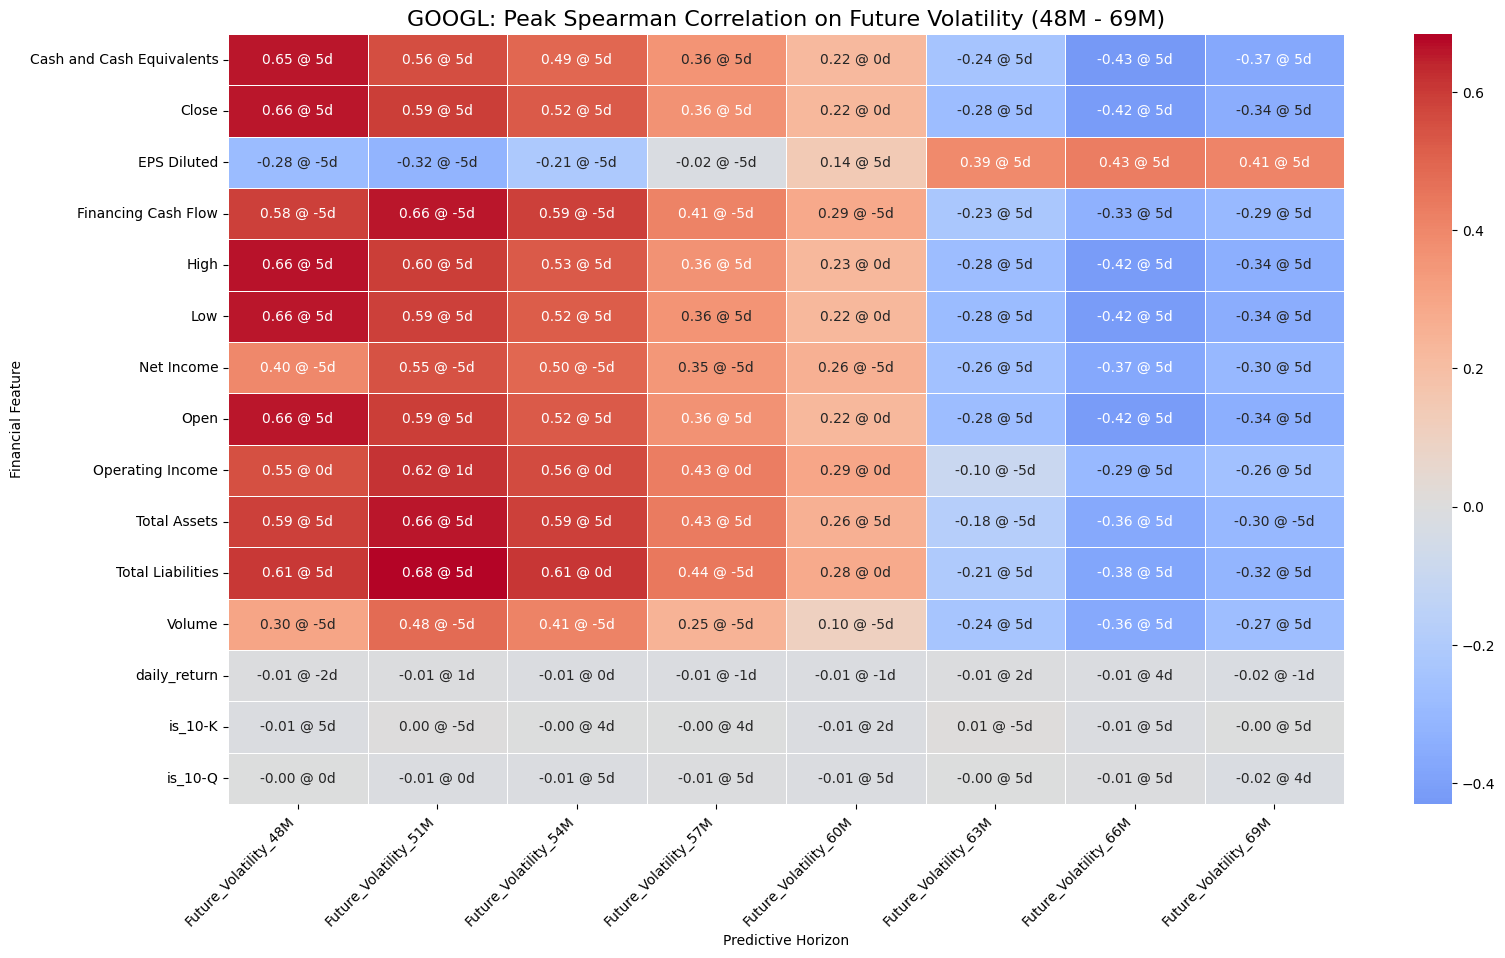

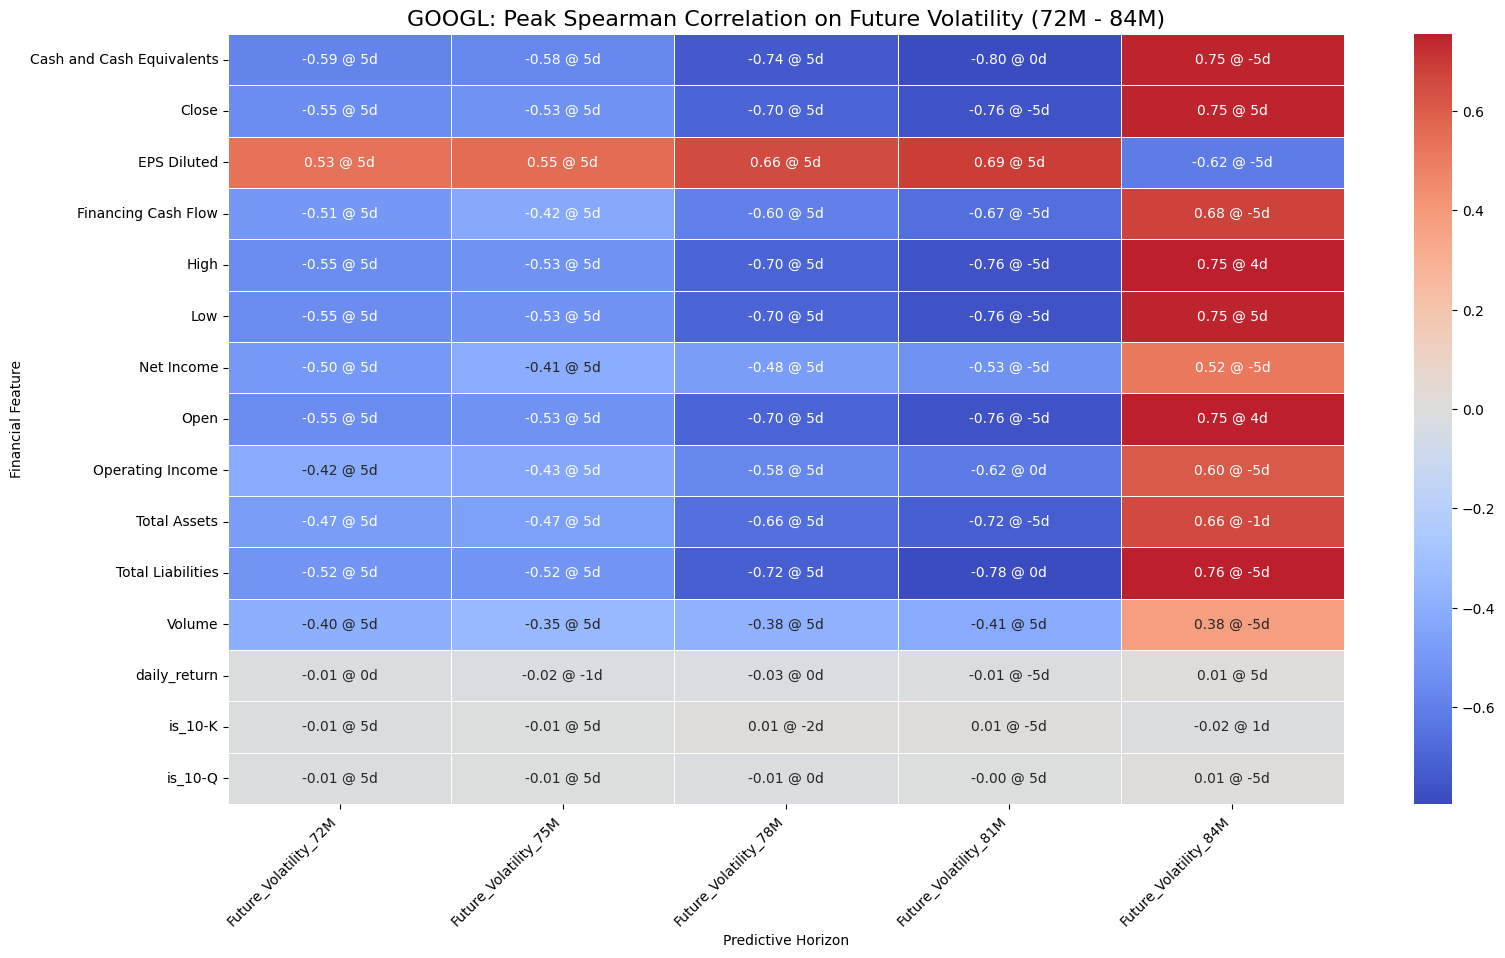

In [39]:
print("3.7: Generating peak correlation heatmaps for Future Volatility.")
print("-" * 30)

# Reuse the same grouping logic
group_size = 8
months = [1] + list(range(3, 85, 3))
num_groups = (len(months) + group_size - 1) // group_size

for ticker, results_df in corr_results.items():
    print(f"--- Generating Volatility Heatmaps for {ticker} ---")
    for i in range(num_groups):
        start_index = i * group_size
        end_index = start_index + group_size
        horizon_group_months = months[start_index:end_index]

        if not horizon_group_months:
            continue
            
        horizon_group_targets = [f'Future_Volatility_{m}M' for m in horizon_group_months]
        
        start_month = horizon_group_months[0]
        end_month = horizon_group_months[-1]

        plot_peak_correlation_heatmap(
            results_df[results_df['Target'].isin(horizon_group_targets)],
            target_filter='Future_Volatility',
            correlation_method='Spearman',
            title=f'{ticker}: Peak Spearman Correlation on Future Volatility ({start_month}M - {end_month}M)',
            figsize=(18, 10),
            annot_kws={"size": 10}
        )

## 4: Feature Engineering and Final Exports

### 4.1: Using the Heatmaps, select features with highest/lowest correlations

*   **Objective:** Identify the most promising financial features and filing types by examining the correlation heatmaps generated in Step 3. The goal is to find which pieces of information have the strongest predictive relationship with future returns and volatility.

*   **Actionable Steps:**
    1.  **Review the Heatmaps:** Carefully inspect the heatmaps for each company (`AAPL`, `NVDA`, `GOOGL`), for both *Future Returns* and *Future Volatility*.
    2.  **Identify Strong Signals:** Look for cells with the darkest colors (dark red for strong positive correlation, dark blue for strong negative). The number in the cell is the Spearman correlation coefficient.
    3.  **Note the Optimal Lag:** The `@ Xd` annotation tells you the best time lag for that feature. A negative lag (e.g., `@ -3d`) is ideal, as it indicates the feature has predictive power *before* an event. A positive lag is less useful for prediction.
    4.  **Create a Shortlist:** Based on your visual analysis, create a list of the most consistently predictive features across different time horizons.

*   **Code Suggestion:** To support your visual analysis, you can programmatically find the top correlations in the `corr_results` dictionary. This helps confirm your findings.

    ```python
    # Example for finding top correlations for AAPL
    aapl_correlations = corr_results.get('AAPL')
    
    if aapl_correlations is not None:
        print("Top 20 Most Predictive Correlations for AAPL (Absolute Spearman Value)")
        
        # Sort by the absolute value of the correlation and show the top results
        top_20 = aapl_correlations.reindex(
            aapl_correlations.Spearman.abs().sort_values(ascending=False).index
        ).head(20)
        
        display(top_20)
    ```

### 4.2: Create drill-down lag-correlation plots

*   **Objective:** For the most promising features identified in step 4.1, create detailed plots to visualize how their predictive power evolves around the filing date. This helps confirm the optimal lag and understand the nature of the relationship (i.e., is it a leading or lagging indicator?).

*   **Actionable Steps:**
    1.  **Choose Feature-Target Pairs:** Select interesting combinations from your shortlist, such as `Operating Income` vs. long-term returns or `is_10-K` vs. short-term volatility.
    2.  **Use the `plot_lag_curves` function:** This function was defined in cell `3.4`. You can call it for any feature and a set of target horizons.
    3.  **Analyze the Curves:** Examine the resulting plots. Does the correlation peak before, at, or after lag 0? A peak at a negative lag suggests the market is reacting to information that is *already present* in the financial data before it is widely disseminated.

*   **Code Suggestion:** You can reuse the `plot_lag_curves` function. Here is an example of how to use it to investigate the `Net Income` feature against several return horizons for a specific company.

    ```python
    # Example for creating a drill-down plot for a specific feature on AAPL
    aapl_correlations = corr_results.get('AAPL')
    
    if aapl_correlations is not None:
        plot_lag_curves(
            aapl_correlations,
            feature_name='Net Income',
            target_base='Future_Return',
            horizons=['12M', '24M', '36M', '60M'], # Choose horizons to compare
            title='Predictive Power of Net Income on AAPL Future Returns'
        )
    ```

### 4.2.b (Optional): Engineer Composite Features

*   **Objective:** Create more sophisticated, powerful predictors by combining existing features. This can help capture nuanced financial concepts like risk-adjusted returns or momentum.

*   **Actionable Steps & Code Suggestions:**
    1.  **Create a "Risk-Adjusted Return" Target (Sharpe-like):** This is a powerful target that balances return with volatility. A feature that predicts this well is highly valuable.
        ```python
        for ticker, df in eda_dfs.items():
            for m in [1] + list(range(3, 85, 3)):
                return_col = f'Future_Return_{m}M'
                vol_col = f'Future_Volatility_{m}M'
                # Avoid division by zero
                if return_col in df.columns and vol_col in df.columns:
                    df[f'Risk_Adj_Return_{m}M'] = df[return_col] / (df[vol_col] + 1e-6)
        ```
    2.  **Create "Growth Momentum" Features:** Calculate the quarter-over-quarter (QoQ) or year-over-year (YoY) change for key financial metrics. This transforms absolute numbers into powerful momentum indicators.
        ```python
        for ticker, df in eda_dfs.items():
            # YoY Operating Income Growth
            df['Op_Income_YoY_Growth'] = df['Operating Income'].pct_change(periods=252)
            
            # Fill NaNs created by pct_change
            df.bfill(inplace=True)
        ```

### 4.3: Choose Final Features and Export

*   **Objective:** Consolidate your work by selecting the final set of features and exporting the clean, analysis-ready DataFrames.

*   **Actionable Steps:**
    1.  **Define Final Feature List:** Based on all your analysis, create a Python list containing the exact column names you want to keep for modeling.
    2.  **Filter and Save:** Loop through your `eda_dfs` dictionary, create a new dictionary containing only the selected features, and save it as a `.pkl` file.
    3.  **Export to CSV (Optional):** For easier inspection, also loop through the final dictionary and save each company's DataFrame as a separate CSV file.

*   **Code Suggestion:**
    ```python
    print("4.3: Finalizing and Exporting Datasets")
    print("-" * 30)

    # 1. Define your final feature set based on the analysis
    final_feature_columns = [
        # Stock price data
        'Open', 'High', 'Low', 'Close', 'Volume',
        # Selected SEC data (example)
        'Net Income', 'Operating Income', 'EPS Diluted',
        # One-hot encoded form types
        'is_10-K', 'is_10-Q',
        # Engineered features (example)
        'Op_Income_YoY_Growth',
        # All target variables
    ]
    # Dynamically add all target columns
    sample_ticker = list(eda_dfs.keys())[0]
    target_cols = [col for col in eda_dfs[sample_ticker].columns if 'Future_' in col or 'Risk_Adj_' in col]
    final_feature_columns.extend(target_cols)

    # 2. Create the final dictionary and filter columns
    final_dfs = {}
    for ticker, df in eda_dfs.items():
        # Ensure all selected columns are present
        cols_to_keep = [col for col in final_feature_columns if col in df.columns]
        final_dfs[ticker] = df[cols_to_keep]
        print(f"Created final DataFrame for {ticker} with shape {final_dfs[ticker].shape}")

    # 3. Export the final dictionary as a .pkl file
    output_dir = 'Datasets'
    pkl_path = os.path.join(output_dir, 'final_model_ready_data.pkl')
    pd.to_pickle(final_dfs, pkl_path)
    print(f"\nFinal DataFrame dictionary saved to: {pkl_path}")

    # 4. (Optional) Export each DataFrame to a separate CSV
    for ticker, df in final_dfs.items():
        csv_path = os.path.join(output_dir, f'{ticker}_final_data.csv')
        df.to_csv(csv_path)
        print(f"Exported {ticker} data to: {csv_path}")

    ```